## Holm, et al - Gene Analysis of Hematopoietic Stem Cell RNASeq Data
### Aged Bone Marrow (normal control) vs. Myeloproliferative Neoplasms (MPN) 
Aged bone marrow: 'X368_ACAGTG_S0', 'X380_ACAGTG_S0', 'X401_ACAGTG_S0', 'X402_ACAGTG_S0', 'X410_ACAGTG_S0', 'X415_ACAGTG_S0', 'X416_ACAGTG_S0', 'X426_ACAGTG_S0', 'X26_1', 'X26_2', 'X26_7', 'X27_8', 
Polycythemia Vera (PV): 'X598.PB.Stem_S12', 'X562.PB.Stem_S0','X689.BM.Stem_S0',
Essential Thrombocythemia (ET):'X431.PB.Stem','X638.BM.Stem'
Myelofibrosis (MF): 'X724.PB.Stem_S4', 'X668.PB.Stem_S4','X736.BM.Stem_S0', 'X600.PB.Stem', 'X580.BM.Stem_S0', 'X664.BM.Stem', 'X428.PB.Stem', 'X566.PB.Stem', 'X600.BM.Stem', 'X407.PB.Stem', 'X569.PB.Stem', 'X581.PB.Stem',
'X599.PB.Stem', 'X621.PB.Stem', 'X422.PB.Stem', 'X767.BM.Stem', 'X744.PB.Stem', 'X567.PB.Stem', 'X560.PB.Stem',
'X576.PB.Stem', 'X573.BM.Stem', 'X670A.PB.Stem', 'X670B.PB.Stem', 'X666.PB.Stem'
Chronic Myeloid Leukemia (CML): 'X608.BM.Stem', 'X616.BM.Stem', 'X571.BM.Stem', 'X727.PB.Stem', 'X703.PB.Stem'
Acute Myeloid Leukemia (AML): '735.PB.Stem', '735.PB.Prog', '591.PB.Stem', '591.BM.Stem', '591.BM.Prog', '591.Stroma', '672A.PB.Stem', '672A.PB.Prog', '672B.PB.Stem'

RNAseq Differential Expression Analysis, QC, functional enrichment analysis
Authors: Art Nasamran, M.S. Cnasamran@ucsd.edu and Kathleen Fisch, Ph.D. Kfisch@ucsd.edu
February 2018
The analysis notebook below that is adapted from the Bioconductor RNASeq123 workflow. It has been edited by Kathleen Fisch (CCBB). https://www.bioconductor.org/help/workflows/RNAseq123/

Primary Analysis Pipeline
QC - FASTQC Alignment -- STARv2.5.3a Quantification -- RSEM-1.3.0 Human genome -- hg19 Annotation -- Gencode v19

In [42]:
#install.packages("R.utils", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gplots", destdir="/mnt/data1/tomw/R/R-3.4.3/")

#source("http://bioconductor.org/biocLite.R")
#biocLite("BiocUpgrade")
#update.packages(instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("limma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("edgeR", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Glimma", instlib="/mnt/data1/tomw/R/R-3.4.3/")
#biocLite("Mus.musculus")
#biocLite("Homo.sapiens", instlib="/mnt/data1/tomw/R/R-3.4.3/",)
#install.packages("splitstackshape", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("PoiClaClu", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("statmod", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("plyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("dplyr", destdir="/mnt/data1/tomw/R/R-3.4.3/")
#install.packages("gdata", destdir="/mnt/data1/tomw/R/R-3.4.3/")

### Preprocess RNASeq Count Data and metadata

In [43]:
library(IRdisplay)
library(limma)
library(edgeR)
library(Glimma)
#library(Mus.musculus)
library(Homo.sapiens)
library(splitstackshape)
library(PoiClaClu)
library(statmod)
library(plyr)
library(dplyr)
library(gdata)
library(org.Hs.eg.db)
EG2SYM <- toTable(org.Hs.egSYMBOL)
library(SPIA)

In [137]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] genefilter_1.56.0                      
 [2] GSVAdata_1.10.0                        
 [3] hgu95a.db_3.2.3                        
 [4] GSEABase_1.36.0                        
 [5] graph_1.52.0                           
 [6] annotate_1.52.1                        
 [7] XML_3.98-1.11                       

In [45]:
name <- "comp2"
name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)
    
meta <- read.csv("combined_meta.csv", stringsAsFactors=FALSE)
meta$CellType <- rep("BM", nrow(meta))
types <- unlist(lapply(meta$ID, function(x) strsplit(x, split="\\.")[[1]][2]))
meta$CellType[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]

[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


'select()' returned 1:many mapping between keys and columns


In [46]:
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])
head(ENS2EG2SYM)

gene_id,ens_id.gene_id,ens_id.ensembl_id,SYM
1,1,ENSG00000121410,A1BG
2,2,ENSG00000175899,A2M
3,3,ENSG00000256069,A2MP1
9,9,ENSG00000171428,NAT1
10,10,ENSG00000156006,NAT2
12,12,ENSG00000196136,SERPINA3


### Prepare count data and metadata for 2 group comparisons

In [130]:
group.ABM.ET.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                       'X431.PB.Stem_S0', 'X638.BM.Stem_S1')
geneCountCrop.ABM.ET.S <- gene_counts_new[, group.ABM.ET.S]
geneCount_names_order <- c(colnames(geneCountCrop.ABM.ET.S)[1:4], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.ET.S)[5:6]))

metaCrop.ABM.ET.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.ET.S <- geneCountCrop.ABM.ET.S

metaCrop.ABM.ET.S$Sample <- reorder.factor(metaCrop.ABM.ET.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.ET.S <- metaCrop.ABM.ET.S %>% arrange(Sample)

In [131]:
group.ABM.PV.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                       'X598.PB.Stem_S12', 'X562.PB.Stem_S0', 
                       'X689.BM.Stem_S0')

geneCountCrop.ABM.PV.S <- gene_counts_new[, group.ABM.PV.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.PV.S)[1:7])
metaCrop.ABM.PV.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.PV.S <- geneCountCrop.ABM.PV.S
metaCrop.ABM.PV.S$Sample <- reorder.factor(metaCrop.ABM.PV.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.PV.S <- metaCrop.ABM.PV.S %>% arrange(Sample)

In [132]:
group.ABM.MF.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X724.PB.Stem_S4', 'X668.PB.Stem_S4', 'X736.BM.Stem_S0', 
                      'X600.PB.Stem_S5', 'X580.BM.Stem_S0', 
                      'X664.BM.Stem_S5', 'X428.PB.Stem_S0',
                      'X566.PB.Stem_S0', 'X600.BM.Stem_S0', 'X407.PB.Stem_S0', 'X569.PB.Stem_S0', 'X581.PB.Stem_S1',
                      'X599.PB.Stem_S0', 'X621.PB.Stem_S3', 'X422.PB.Stem_S0', 'X767.BM.Stem_S0', 'X744.PB.Stem_S0', 
                      'X567.PB.Stem_S0', 'X560.PB.Stem_S0',
                      'X576.PB.Stem_S0', 'X573.BM.Stem_S0', 
                      'X670A.PB.Stem_S4', 'X670B.PB.Stem_S5', 'X666.PB.Stem_S3')

geneCountCrop.ABM.MF.S <- gene_counts_new[, group.ABM.MF.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.MF.S)[1:7], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.MF.S)[8:28]))
metaCrop.ABM.MF.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.MF.S <- geneCountCrop.ABM.MF.S

metaCrop.ABM.MF.S$Sample <- reorder.factor(metaCrop.ABM.MF.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.MF.S <- metaCrop.ABM.MF.S %>% arrange(Sample)

In [133]:
colnames(gene_counts_new)[sapply(c('X608.BM.Stem', 'X616.BM.Stem', 'X571.BM.Stem', 'X727.PB.Stem', 'X703.PB.Stem'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.ABM.CML.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X608.BM.Stem_S0', 'X616.BM.Stem_S0', 'X571.BM.Stem_S0', 'X727.PB.Stem_S5', 'X703.PB.Stem_S0')

geneCountCrop.ABM.CML.S <- gene_counts_new[, group.ABM.CML.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.CML.S)[1:9], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.ABM.CML.S)[5:9]))
metaCrop.ABM.CML.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.CML.S <- geneCountCrop.ABM.CML.S
metaCrop.ABM.CML.S$Sample <- reorder.factor(metaCrop.ABM.CML.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.CML.S <- metaCrop.ABM.CML.S %>% arrange(Sample)

[1] "X608.BM.Stem_S0" "X616.BM.Stem_S0" "X571.BM.Stem_S0" "X727.PB.Stem_S5"
[5] "X703.PB.Stem_S0"

In [129]:
colnames(gene_counts_new)[sapply(c('X735.PB.Stem', 'X591.BM.Stem', 'X591.PB.Stem', 'X672A.PB.Stem', 'X672B.PB.Stem'), 
                                function(x) grep(x, colnames(gene_counts_new)))]
group.ABM.AML.S <- c('X26_1', 'X26_2', 'X26_7', 'X27_8', 
                     'X735.PB.Stem_S7', 'X591.BM.Stem_S0', 'X591.PB.Stem_S0', 'X672A.PB.Stem_S5', 'X672B.PB.Stem_S8')

geneCountCrop.ABM.AML.S <- gene_counts_new[, group.ABM.AML.S]

geneCount_names_order <- c(colnames(geneCountCrop.ABM.AML.S)[1:9])
metaCrop.ABM.AML.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.ABM.AML.S <- geneCountCrop.ABM.AML.S
metaCrop.ABM.AML.S$Sample <- reorder.factor(metaCrop.ABM.AML.S$Sample, new.order=geneCount_names_order)
metaCrop.ABM.AML.S <- metaCrop.ABM.AML.S %>% arrange(Sample)

[1] "X735.PB.Stem_S7"  "X591.BM.Stem_S0"  "X591.PB.Stem_S0"  "X672A.PB.Stem_S5"
[5] "X672B.PB.Stem_S8"

In [52]:
group.CML.MF.S <- c('X608.BM.Stem_S0', 'X616.BM.Stem_S0', 'X571.BM.Stem_S0', 'X727.PB.Stem_S5', 'X703.PB.Stem_S0',
                      'X724.PB.Stem_S4', 'X668.PB.Stem_S4', 'X736.BM.Stem_S0', 
                      'X600.PB.Stem_S5', #'X580.BM.Stem_S0', 
                      'X664.BM.Stem_S5', 'X428.PB.Stem_S0',
                      'X566.PB.Stem_S0', 'X600.BM.Stem_S0', 'X407.PB.Stem_S0', 'X569.PB.Stem_S0', 'X581.PB.Stem_S1',
                      'X599.PB.Stem_S0', 'X621.PB.Stem_S3', 'X422.PB.Stem_S0', 'X767.BM.Stem_S0', 'X744.PB.Stem_S0', 
                      'X567.PB.Stem_S0', 'X560.PB.Stem_S0',
                      'X576.PB.Stem_S0', #'X573.BM.Stem_S0', 
                      'X670A.PB.Stem_S4', 'X670B.PB.Stem_S5', 'X666.PB.Stem_S3')
which(!group.CML.MF.S %in% colnames(gene_counts_new))
geneCountCrop.CML.MF.S <- gene_counts_new[, group.CML.MF.S]

geneCount_names_order <- c(gsub("_S[0-9]$", "", colnames(geneCountCrop.CML.MF.S)[1:5]),
                           colnames(geneCountCrop.CML.MF.S)[6:8], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.CML.MF.S)[9:27]))
metaCrop.CML.MF.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.CML.MF.S <- geneCountCrop.CML.MF.S
metaCrop.CML.MF.S$Sample <- reorder.factor(metaCrop.CML.MF.S$Sample, new.order=geneCount_names_order)
metaCrop.CML.MF.S <- metaCrop.CML.MF.S %>% arrange(Sample)

[1] 27

integer(0)

[1] 57820    27

[1] 27 10

In [128]:
group.AML.MF.S <- c('X735.PB.Stem_S7', 'X591.BM.Stem_S0', 'X591.PB.Stem_S0', 'X672A.PB.Stem_S5', 'X672B.PB.Stem_S8',
                      'X724.PB.Stem_S4', 'X668.PB.Stem_S4', 'X736.BM.Stem_S0', 
                      'X600.PB.Stem_S5', #'X580.BM.Stem_S0', 
                      'X664.BM.Stem_S5', 'X428.PB.Stem_S0',
                      'X566.PB.Stem_S0', 'X600.BM.Stem_S0', 'X407.PB.Stem_S0', 'X569.PB.Stem_S0', 'X581.PB.Stem_S1',
                      'X599.PB.Stem_S0', 'X621.PB.Stem_S3', 'X422.PB.Stem_S0', 'X767.BM.Stem_S0', 'X744.PB.Stem_S0', 
                      'X567.PB.Stem_S0', 'X560.PB.Stem_S0',
                      'X576.PB.Stem_S0', #'X573.BM.Stem_S0', 
                      'X670A.PB.Stem_S4', 'X670B.PB.Stem_S5', 'X666.PB.Stem_S3')

which(!group.AML.MF.S %in% colnames(gene_counts_new))
geneCountCrop.AML.MF.S <- gene_counts_new[, group.AML.MF.S]

geneCount_names_order <- c(colnames(geneCountCrop.AML.MF.S)[1:8], 
                           gsub("_S[0-9]$", "", colnames(geneCountCrop.AML.MF.S)[9:27]))
metaCrop.AML.MF.S <- meta[which(meta$Sample %in% geneCount_names_order), ]
geneCount.AML.MF.S <- geneCountCrop.AML.MF.S

metaCrop.AML.MF.S$Sample <- reorder.factor(metaCrop.AML.MF.S$Sample, new.order=geneCount_names_order)
metaCrop.AML.MF.S <- metaCrop.AML.MF.S %>% arrange(Sample)

integer(0)

In [54]:
library(RColorBrewer)
library(gplots)
load("gencodev19_ANNOT.RData")
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )

#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

pcgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", protein_coding_ids),]
ncgenes <- genes[genes$ENSEMBL %in% gsub("[.].*$","", ncRNA_ids),]
head(pcgenes)

ENSEMBL,ENTREZID,SYMBOL
ENSG00000000003,7105,TSPAN6
ENSG00000000005,64102,TNMD
ENSG00000000419,8813,DPM1
ENSG00000000457,57147,SCYL3
ENSG00000000460,55732,C1orf112
ENSG00000000938,2268,FGR


### Prepare DGEList and generate MDS plots

Warning message in brewer.pal(nlevels(col.samp.ABM.ET.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

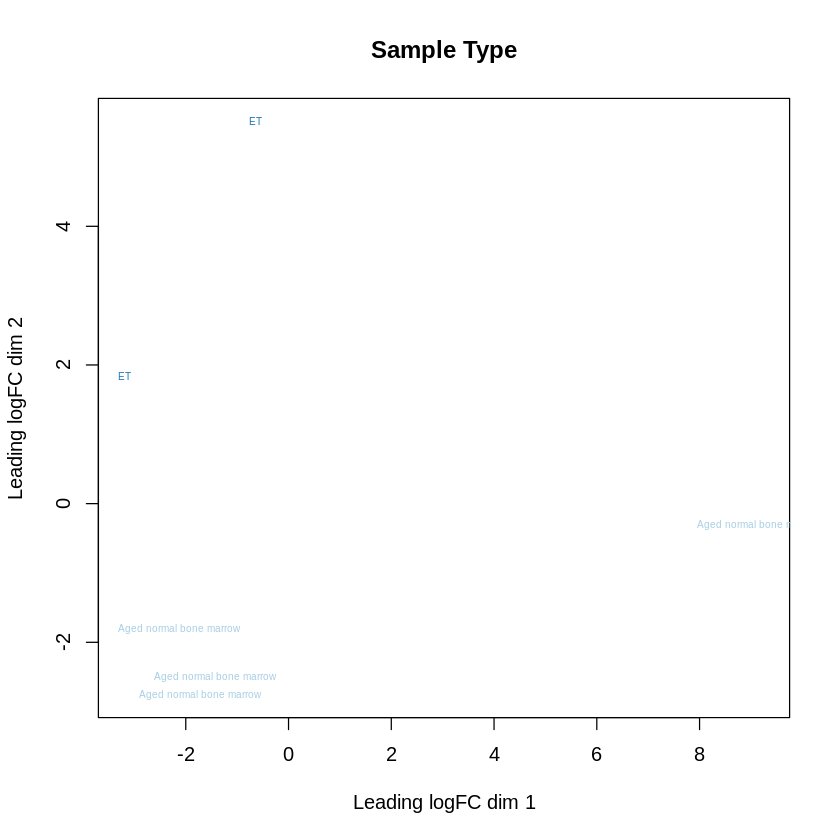

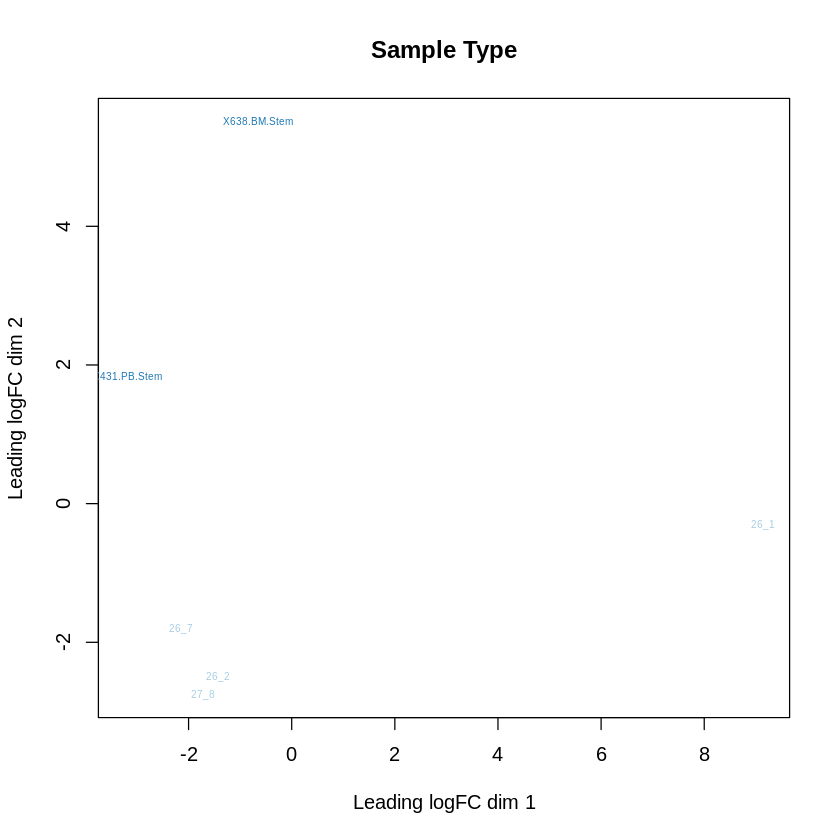

In [127]:
geneCount_coding.ABM.ET.S <- subset(geneCount.ABM.ET.S, row.names(geneCount.ABM.ET.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.ET.S))
rownames(geneCount_coding.ABM.ET.S) <- id_list
x.ABM.ET.S <- DGEList(counts = geneCount_coding.ABM.ET.S, lib.size = colSums(geneCount_coding.ABM.ET.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.ET.S)), samples = metaCrop.ABM.ET.S,
group = metaCrop.ABM.ET.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.ET.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.ET.S <- cpm(x.ABM.ET.S)
lcpm.ABM.ET.S <- cpm(x.ABM.ET.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.ET.S>1)>=5
x.ABM.ET.S <- x.ABM.ET.S[keep.exprs,, keep.lib.sizes=FALSE]

x.ABM.ET.S <- calcNormFactors(x.ABM.ET.S, method = "TMM")
col.samp.ABM.ET.S <- samp.type.ABM.ET.S <- as.factor(x.ABM.ET.S$samples$Sample.type)
levels(col.samp.ABM.ET.S) <-  brewer.pal(nlevels(col.samp.ABM.ET.S), "Paired") #if more than 2 conditions
col.samp.ABM.ET.S <- as.character(col.samp.ABM.ET.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.ET.S, labels=samp.type.ABM.ET.S, col=col.samp.ABM.ET.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.ET.S, labels=x.ABM.ET.S$samples$group, col=col.samp.ABM.ET.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.PV.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

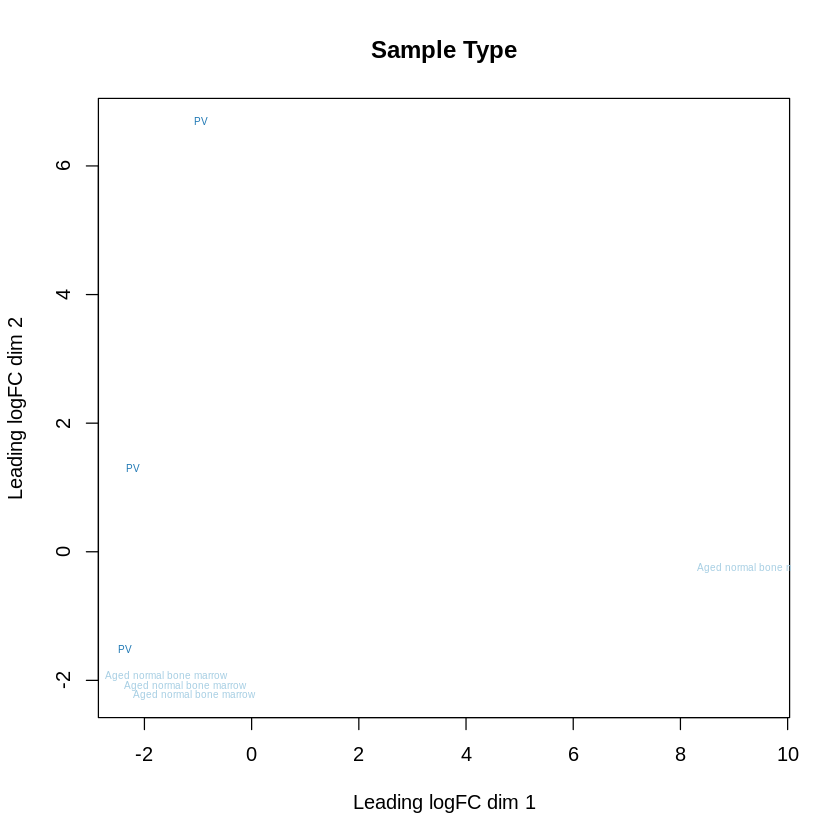

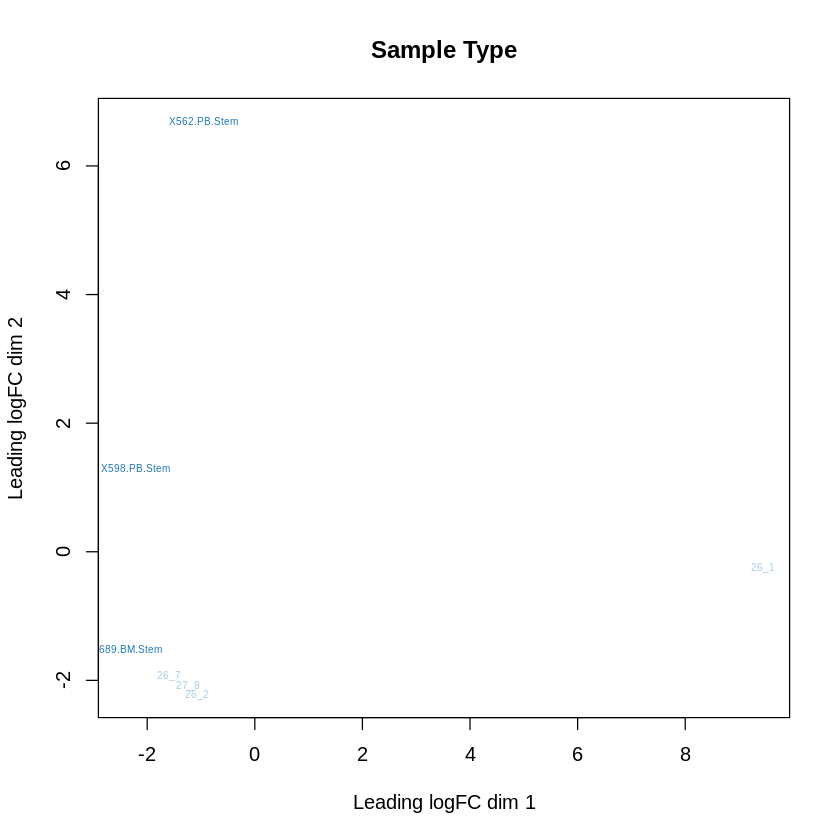

In [126]:
geneCount_coding.ABM.PV.S <- subset(geneCount.ABM.PV.S, row.names(geneCount.ABM.PV.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.PV.S))
rownames(geneCount_coding.ABM.PV.S) <- id_list
x.ABM.PV.S <- DGEList(counts = geneCount_coding.ABM.PV.S, lib.size = colSums(geneCount_coding.ABM.PV.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.PV.S)), samples = metaCrop.ABM.PV.S,
group = metaCrop.ABM.PV.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.PV.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]


cpm.ABM.PV.S <- cpm(x.ABM.PV.S)
lcpm.ABM.PV.S <- cpm(x.ABM.PV.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.PV.S>1)>=6
x.ABM.PV.S <- x.ABM.PV.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.PV.S <- calcNormFactors(x.ABM.PV.S, method = "TMM")

col.samp.ABM.PV.S <- samp.type.ABM.PV.S <- as.factor(x.ABM.PV.S$samples$Sample.type)
levels(col.samp.ABM.PV.S) <-  brewer.pal(nlevels(col.samp.ABM.PV.S), "Paired") #if more than 2 conditions
col.samp.ABM.PV.S <- as.character(col.samp.ABM.PV.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.PV.S, labels=samp.type.ABM.PV.S, col=col.samp.ABM.PV.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.PV.S, labels=x.ABM.PV.S$samples$group, col=col.samp.ABM.PV.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.MF.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

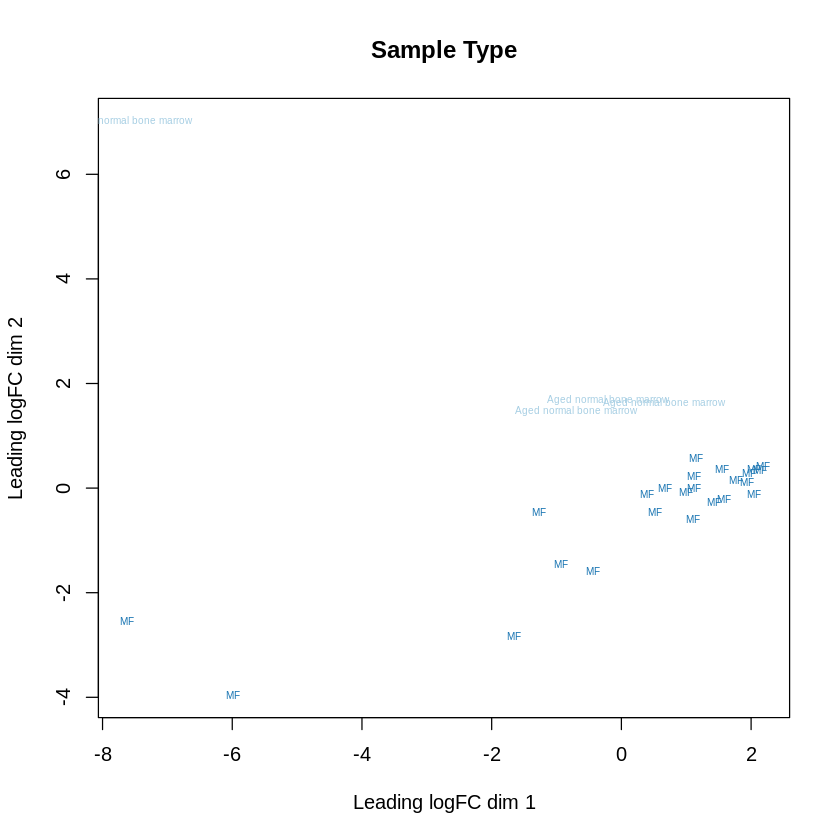

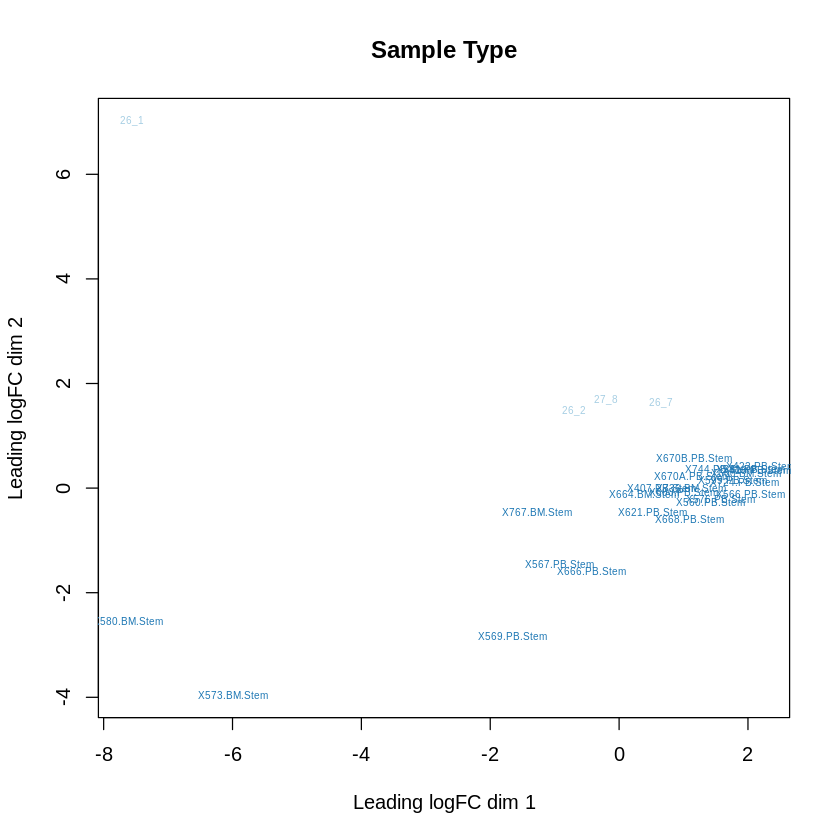

In [125]:
geneCount_coding.ABM.MF.S <- subset(geneCount.ABM.MF.S, row.names(geneCount.ABM.MF.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.MF.S))
rownames(geneCount_coding.ABM.MF.S) <- id_list
x.ABM.MF.S <- DGEList(counts = geneCount_coding.ABM.MF.S, lib.size = colSums(geneCount_coding.ABM.MF.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.MF.S)), samples = metaCrop.ABM.MF.S,
group = metaCrop.ABM.MF.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.MF.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.MF.S <- cpm(x.ABM.MF.S)
lcpm.ABM.MF.S <- cpm(x.ABM.MF.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.MF.S>1)>=27
x.ABM.MF.S <- x.ABM.MF.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.MF.S <- calcNormFactors(x.ABM.MF.S, method = "TMM")

col.samp.ABM.MF.S <- samp.type.ABM.MF.S <- as.factor(x.ABM.MF.S$samples$Sample.type)
levels(col.samp.ABM.MF.S) <-  brewer.pal(nlevels(col.samp.ABM.MF.S), "Paired") #if more than 2 conditions
col.samp.ABM.MF.S <- as.character(col.samp.ABM.MF.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.MF.S, labels=samp.type.ABM.MF.S, col=col.samp.ABM.MF.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.MF.S, labels=x.ABM.MF.S$samples$group, col=col.samp.ABM.MF.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.CML.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

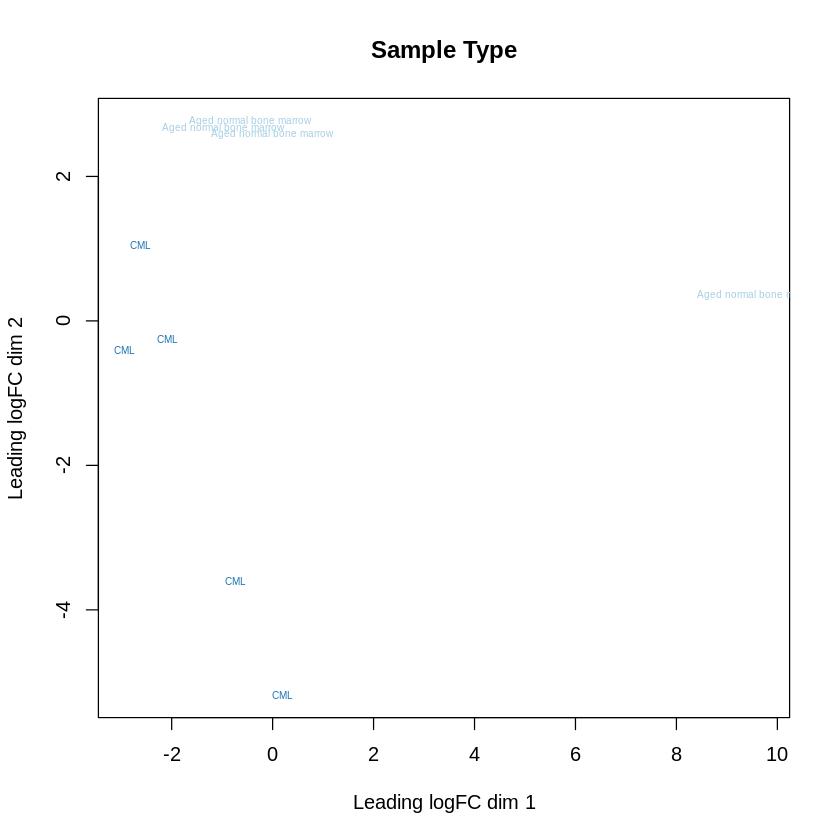

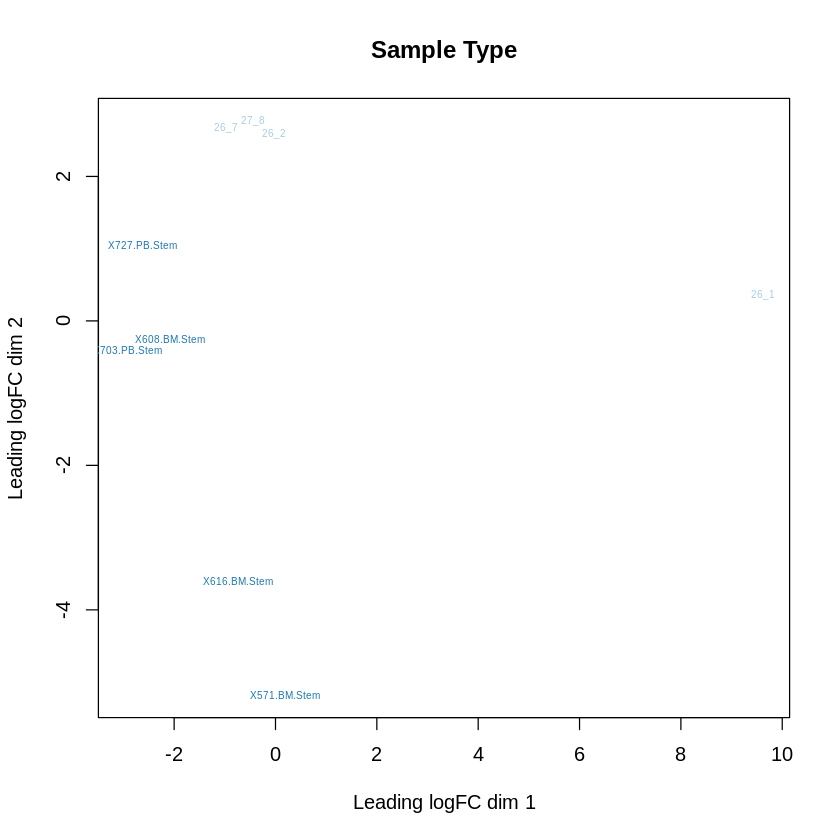

In [124]:
geneCount_coding.ABM.CML.S <- subset(geneCount.ABM.CML.S, row.names(geneCount.ABM.CML.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.CML.S))
rownames(geneCount_coding.ABM.CML.S) <- id_list
x.ABM.CML.S <- DGEList(counts = geneCount_coding.ABM.CML.S, lib.size = colSums(geneCount_coding.ABM.CML.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.CML.S)), samples = metaCrop.ABM.CML.S,
group = metaCrop.ABM.CML.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.CML.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.CML.S <- cpm(x.ABM.CML.S)
lcpm.ABM.CML.S <- cpm(x.ABM.CML.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.CML.S>1)>=8
x.ABM.CML.S <- x.ABM.CML.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.CML.S <- calcNormFactors(x.ABM.CML.S, method = "TMM")

col.samp.ABM.CML.S <- samp.type.ABM.CML.S <- as.factor(x.ABM.CML.S$samples$Sample.type)
levels(col.samp.ABM.CML.S) <-  brewer.pal(nlevels(col.samp.ABM.CML.S), "Paired") #if more than 2 conditions
col.samp.ABM.CML.S <- as.character(col.samp.ABM.CML.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.CML.S, labels=samp.type.ABM.CML.S, col=col.samp.ABM.CML.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.CML.S, labels=x.ABM.CML.S$samples$group, col=col.samp.ABM.CML.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.ABM.AML.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

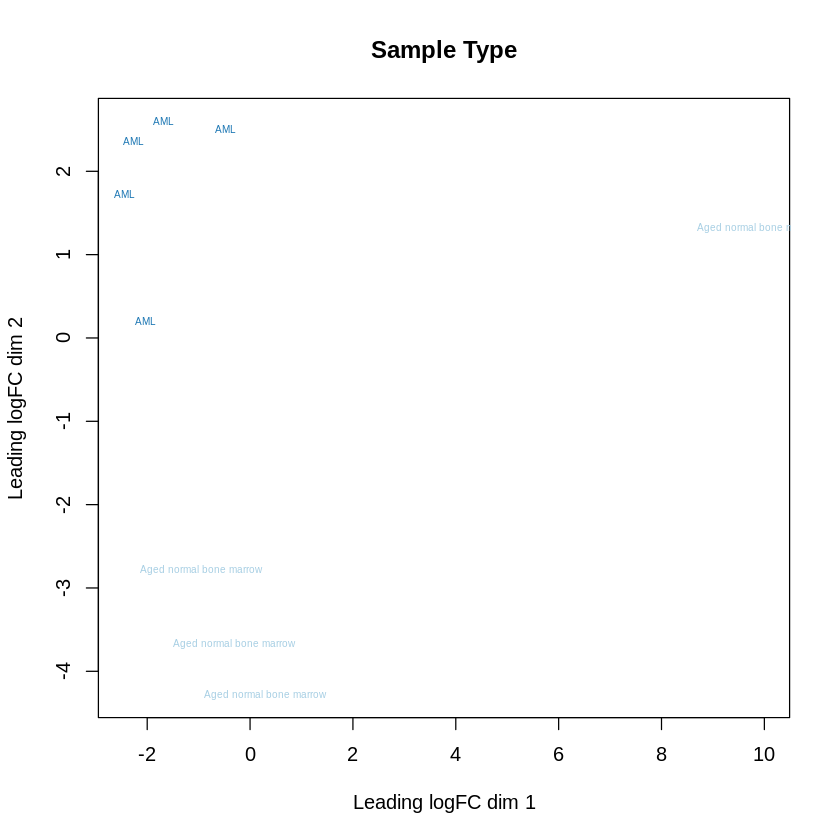

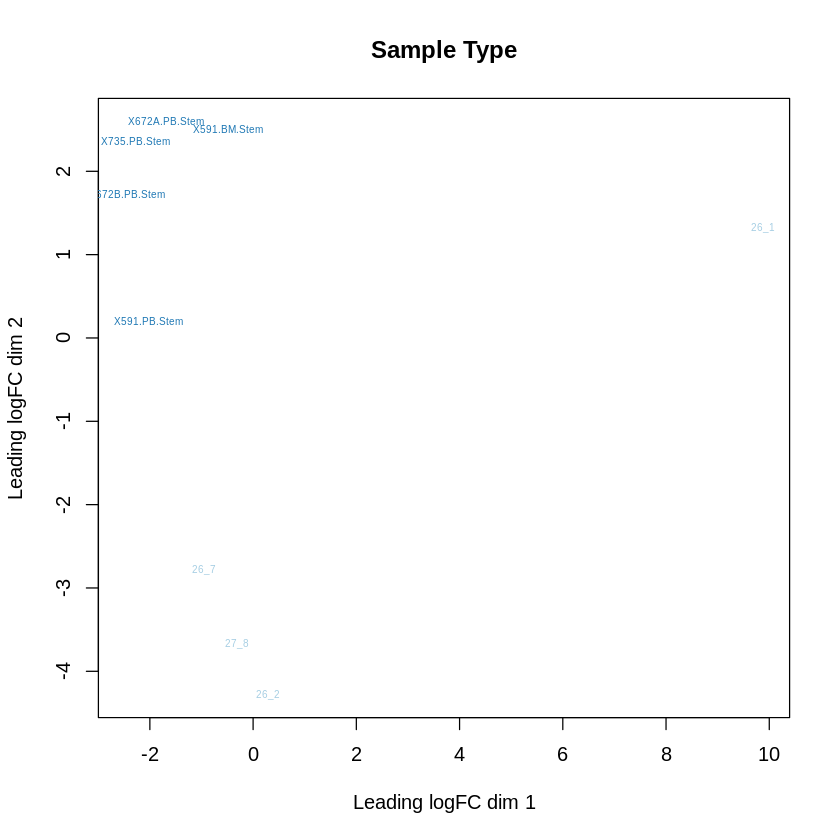

In [123]:
geneCount_coding.ABM.AML.S <- subset(geneCount.ABM.AML.S, row.names(geneCount.ABM.AML.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.ABM.AML.S))
rownames(geneCount_coding.ABM.AML.S) <- id_list
x.ABM.AML.S <- DGEList(counts = geneCount_coding.ABM.AML.S, lib.size = colSums(geneCount_coding.ABM.AML.S),
norm.factors = rep(1,ncol(geneCount_coding.ABM.AML.S)), samples = metaCrop.ABM.AML.S,
group = metaCrop.ABM.AML.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.ABM.AML.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.ABM.AML.S <- cpm(x.ABM.AML.S)
lcpm.ABM.AML.S <- cpm(x.ABM.AML.S, log=TRUE)
keep.exprs <- rowSums(cpm.ABM.AML.S>1)>=8
x.ABM.AML.S <- x.ABM.AML.S[keep.exprs,, keep.lib.sizes=FALSE]
x.ABM.AML.S <- calcNormFactors(x.ABM.AML.S, method = "TMM")

col.samp.ABM.AML.S <- samp.type.ABM.AML.S <- as.factor(x.ABM.AML.S$samples$Sample.type)
levels(col.samp.ABM.AML.S) <-  brewer.pal(nlevels(col.samp.ABM.AML.S), "Paired") #if more than 2 conditions
col.samp.ABM.AML.S <- as.character(col.samp.ABM.AML.S)

par(mfrow=c(1,1))
plotMDS(lcpm.ABM.AML.S, labels=samp.type.ABM.AML.S, col=col.samp.ABM.AML.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.ABM.AML.S, labels=x.ABM.AML.S$samples$group, col=col.samp.ABM.AML.S, cex=.5)
title(main="Sample Type")

[1] 20345    27

[1] 10918    27

Warning message in brewer.pal(nlevels(col.samp.CML.MF.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

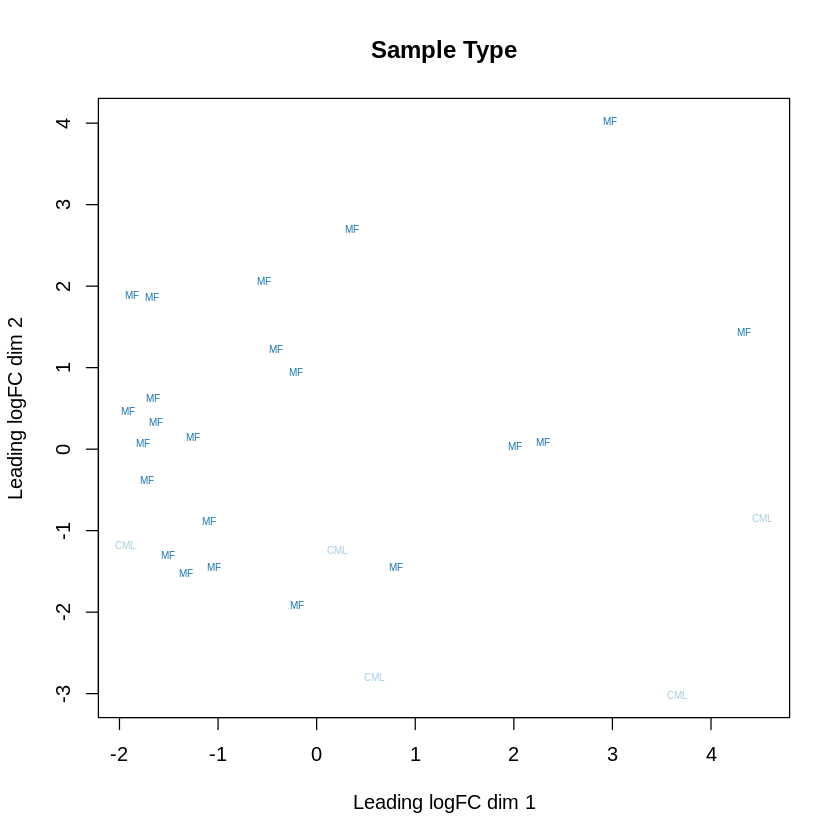

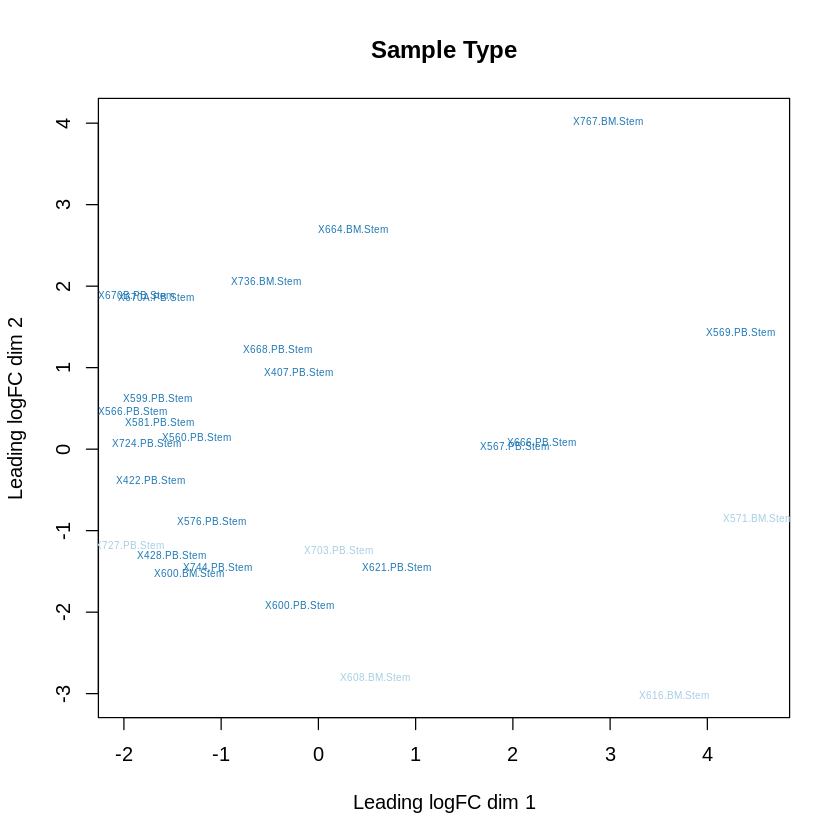

In [60]:
geneCount_coding.CML.MF.S <- subset(geneCount.CML.MF.S, row.names(geneCount.CML.MF.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.CML.MF.S))
rownames(geneCount_coding.CML.MF.S) <- id_list
x.CML.MF.S <- DGEList(counts = geneCount_coding.CML.MF.S, lib.size = colSums(geneCount_coding.CML.MF.S),
norm.factors = rep(1,ncol(geneCount_coding.CML.MF.S)), samples = metaCrop.CML.MF.S,
group = metaCrop.CML.MF.S$Treatment, genes = id_list, remove.zeros = FALSE) 
dim(geneCount_coding.CML.MF.S)
x.CML.MF.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.CML.MF.S <- cpm(x.CML.MF.S)
lcpm.CML.MF.S <- cpm(x.CML.MF.S, log=TRUE)
keep.exprs <- rowSums(cpm.CML.MF.S>1)>=24
x.CML.MF.S <- x.CML.MF.S[keep.exprs,, keep.lib.sizes=FALSE]
dim(x.CML.MF.S)
x.CML.MF.S <- calcNormFactors(x.CML.MF.S, method = "TMM")

col.samp.CML.MF.S <- samp.type.CML.MF.S <- as.factor(x.CML.MF.S$samples$Sample.type)
levels(col.samp.CML.MF.S) <-  brewer.pal(nlevels(col.samp.CML.MF.S), "Paired") #if more than 2 conditions
col.samp.CML.MF.S <- as.character(col.samp.CML.MF.S)

par(mfrow=c(1,1))
plotMDS(lcpm.CML.MF.S, labels=samp.type.CML.MF.S, col=col.samp.CML.MF.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.CML.MF.S, labels=x.CML.MF.S$samples$group, col=col.samp.CML.MF.S, cex=.5)
title(main="Sample Type")

Warning message in brewer.pal(nlevels(col.samp.AML.MF.S), "Paired"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

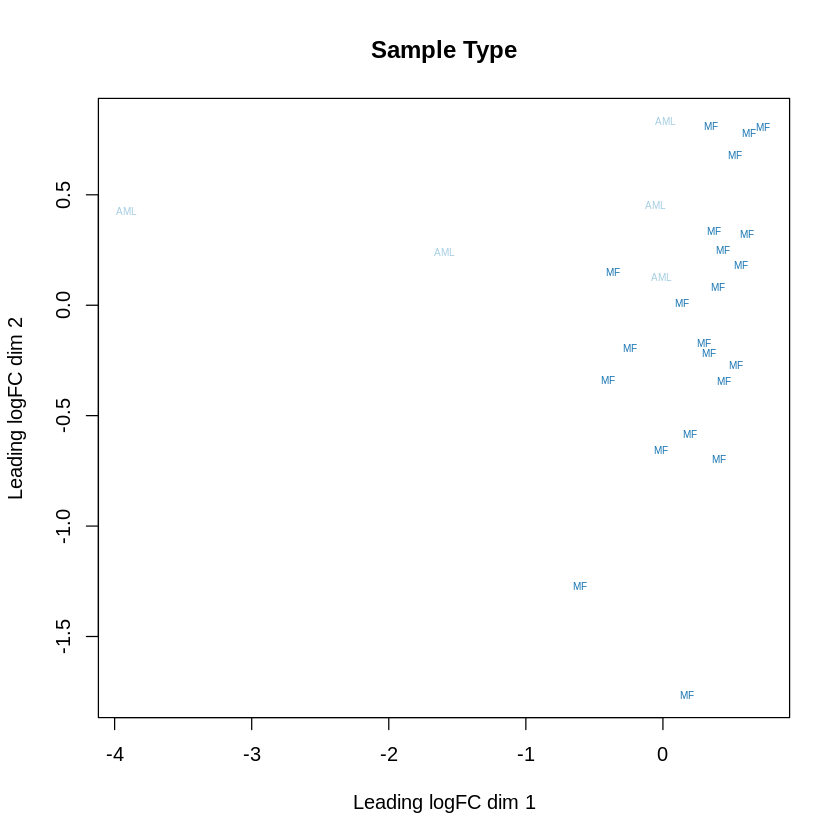

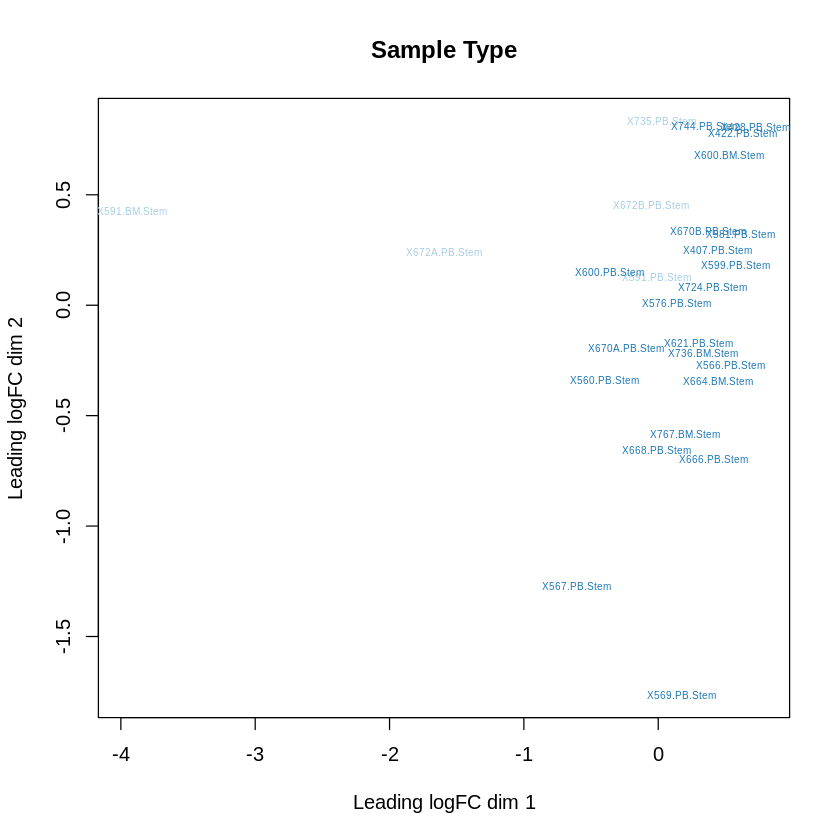

In [122]:
geneCount_coding.AML.MF.S <- subset(geneCount.AML.MF.S, row.names(geneCount.AML.MF.S) %in% protein_coding_ids)

id_list <- gsub("[.].*$","", rownames(geneCount_coding.AML.MF.S))
rownames(geneCount_coding.AML.MF.S) <- id_list
x.AML.MF.S <- DGEList(counts = geneCount_coding.AML.MF.S, lib.size = colSums(geneCount_coding.AML.MF.S),
norm.factors = rep(1,ncol(geneCount_coding.AML.MF.S)), samples = metaCrop.AML.MF.S,
group = metaCrop.AML.MF.S$Treatment, genes = id_list, remove.zeros = FALSE) 
x.AML.MF.S$genes[,2:3] <- pcgenes[match(pcgenes$ENSEMBL,id_list),c("ENTREZID","SYMBOL")]

cpm.AML.MF.S <- cpm(x.AML.MF.S)
lcpm.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)
keep.exprs <- rowSums(cpm.AML.MF.S>1)>=27
x.AML.MF.S <- x.AML.MF.S[keep.exprs,, keep.lib.sizes=FALSE]
lcpm.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)

x.AML.MF.S <- calcNormFactors(x.AML.MF.S, method = "TMM")

col.samp.AML.MF.S <- samp.type.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type)
levels(col.samp.AML.MF.S) <-  brewer.pal(nlevels(col.samp.AML.MF.S), "Paired") #if more than 2 conditions
col.samp.AML.MF.S <- as.character(col.samp.AML.MF.S)

par(mfrow=c(1,1))
plotMDS(lcpm.AML.MF.S, labels=samp.type.AML.MF.S, col=col.samp.AML.MF.S, cex=.5)
title(main="Sample Type")
plotMDS(lcpm.AML.MF.S, labels=x.AML.MF.S$samples$group, col=col.samp.AML.MF.S, cex=.5)
title(main="Sample Type")

### Limma Analysis to identify Differentially Expressed Genes

In [62]:
samples.tmp <- x.ABM.ET.S$sample$Sample.type
table(samples.tmp)
samples.ABM.ET.S <- as.factor(samples.tmp)
design.ABM.ET.S <- model.matrix(~0 + samples.ABM.ET.S)
colnames(design.ABM.ET.S) <- c("AgedBoneMarrowCtrl", "ET")
cm.ABM.ET.S <- makeContrasts(ET-AgedBoneMarrowCtrl, levels=design.ABM.ET.S)
v.ABM.ET.S <- voom(x.ABM.ET.S, design.ABM.ET.S, plot=FALSE)
vfit.ABM.ET.S <- lmFit(v.ABM.ET.S,design.ABM.ET.S)
vfit.ABM.ET.S <- contrasts.fit(vfit.ABM.ET.S, contrasts=cm.ABM.ET.S)
efit.ABM.ET.S <- eBayes(vfit.ABM.ET.S)
dt.ABM.ET.S <- decideTests(efit.ABM.ET.S)
summary(dt.ABM.ET.S)
length(which(dt.ABM.ET.S!=0))
topTable.ABM.ET.S <- topTreat(efit.ABM.ET.S, coef=1, n=Inf, sort.by="p")
topTable.ABM.ET.S.anno <- cbind(topTable.ABM.ET.S, 
                                annot=pcgenes[match(rownames(topTable.ABM.ET.S), pcgenes$ENSEMBL), c("ENTREZID","SYMBOL")])
#write.csv(topTable.ABM.ET.S.anno, file="Limma_DEanno_AgedBMvsET_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      ET 
                      4                       2 

   ET - AgedBoneMarrowCtrl
-1                      22
0                    11023
1                        5

[1] 27

In [134]:
samples.tmp <- x.ABM.PV.S$sample$Sample.type
table(samples.tmp)
samples.ABM.PV.S <- as.factor(samples.tmp)
design.ABM.PV.S <- model.matrix(~0 + samples.ABM.PV.S)
colnames(design.ABM.PV.S) <- c("AgedBoneMarrowCtrl", "PV.ET")
cm.ABM.PV.S <- makeContrasts(PV.ET-AgedBoneMarrowCtrl, levels=design.ABM.PV.S)
v.ABM.PV.S <- voom(x.ABM.PV.S, design.ABM.PV.S, plot=FALSE)
vfit.ABM.PV.S <- lmFit(v.ABM.PV.S,design.ABM.PV.S)
vfit.ABM.PV.S <- contrasts.fit(vfit.ABM.PV.S, contrasts=cm.ABM.PV.S)
efit.ABM.PV.S <- eBayes(vfit.ABM.PV.S)
dt.ABM.PV.S <- decideTests(efit.ABM.PV.S)
summary(dt.ABM.PV.S)
length(which(dt.ABM.PV.S!=0))
topTable.ABM.PV.S <- topTreat(efit.ABM.PV.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.PV.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsPV_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      PV 
                      4                       3 

   PV.ET - AgedBoneMarrowCtrl
-1                        477
0                       10049
1                         287

[1] 764

In [64]:
samples.tmp <- x.ABM.MF.S$sample$Sample.type
table(samples.tmp)
samples.ABM.MF.S <- as.factor(samples.tmp)
design.ABM.MF.S <- model.matrix(~0 + samples.ABM.MF.S)
colnames(design.ABM.MF.S) <- c("AgedBoneMarrowCtrl", "MF")
cm.ABM.MF.S <- makeContrasts(MF-AgedBoneMarrowCtrl, levels=design.ABM.MF.S)
v.ABM.MF.S <- voom(x.ABM.MF.S, design.ABM.MF.S, plot=FALSE)
vfit.ABM.MF.S <- lmFit(v.ABM.MF.S,design.ABM.MF.S)
vfit.ABM.MF.S <- contrasts.fit(vfit.ABM.MF.S, contrasts=cm.ABM.MF.S)
efit.ABM.MF.S <- eBayes(vfit.ABM.MF.S)
dt.ABM.MF.S <- decideTests(efit.ABM.MF.S)
summary(dt.ABM.MF.S)
length(which(dt.ABM.MF.S!=0))
topTable.ABM.MF.S <- topTreat(efit.ABM.MF.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.MF.S, file="LImma_DE_AgedBMvsMF_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                      MF 
                      4                      24 

   MF - AgedBoneMarrowCtrl
-1                    1550
0                     5528
1                     1531

[1] 3081

In [65]:
samples.tmp <- x.ABM.CML.S$sample$Sample.type
table(samples.tmp)
samples.ABM.CML.S <- as.factor(samples.tmp)
design.ABM.CML.S <- model.matrix(~0 + samples.ABM.CML.S)
colnames(design.ABM.CML.S) <- c("AgedBoneMarrowCtrl", "CML")
cm.ABM.CML.S <- makeContrasts(CML-AgedBoneMarrowCtrl, levels=design.ABM.CML.S)
v.ABM.CML.S <- voom(x.ABM.CML.S, design.ABM.CML.S, plot=FALSE)
vfit.ABM.CML.S <- lmFit(v.ABM.CML.S,design.ABM.CML.S)
vfit.ABM.CML.S <- contrasts.fit(vfit.ABM.CML.S, contrasts=cm.ABM.CML.S)
efit.ABM.CML.S <- eBayes(vfit.ABM.CML.S)
dt.ABM.CML.S <- decideTests(efit.ABM.CML.S)
summary(dt.ABM.CML.S)
length(which(dt.ABM.CML.S!=0))
topTable.ABM.CML.S <- topTreat(efit.ABM.CML.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.CML.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsCML_Stem_Holm_Jamieson_RNASeq_TCW.csv")


samples.tmp
Aged normal bone marrow                     CML 
                      4                       5 

   CML - AgedBoneMarrowCtrl
-1                      456
0                      9600
1                       367

[1] 823

In [66]:
samples.tmp <- x.ABM.AML.S$sample$Sample.type
table(samples.tmp)
samples.ABM.AML.S <- as.factor(samples.tmp)
design.ABM.AML.S <- model.matrix(~0 + samples.ABM.AML.S)
colnames(design.ABM.AML.S) <- c("AgedBoneMarrowCtrl", "AML")
cm.ABM.AML.S <- makeContrasts(AML-AgedBoneMarrowCtrl, levels=design.ABM.AML.S)
v.ABM.AML.S <- voom(x.ABM.AML.S, design.ABM.AML.S, plot=FALSE)
vfit.ABM.AML.S <- lmFit(v.ABM.AML.S,design.ABM.AML.S)
vfit.ABM.AML.S <- contrasts.fit(vfit.ABM.AML.S, contrasts=cm.ABM.AML.S)
efit.ABM.AML.S <- eBayes(vfit.ABM.AML.S)
dt.ABM.AML.S <- decideTests(efit.ABM.AML.S)
summary(dt.ABM.AML.S)
length(which(dt.ABM.AML.S!=0))
topTable.ABM.AML.S <- topTreat(efit.ABM.AML.S, coef=1, n=Inf, sort.by="p")
#write.csv(topTable.ABM.CML.S, file="RNAseq_DEgenelists/Limma_DE_AgedBMvsAML_Stem_Holm_Jamieson_RNASeq_TCW.csv")

samples.tmp
Aged normal bone marrow                     AML 
                      4                       5 

   AML - AgedBoneMarrowCtrl
-1                      417
0                      9799
1                       155

[1] 572

In [135]:

samples.tmp <- x.CML.MF.S$sample$Sample.type
table(samples.tmp)
samples.CML.MF.S <- as.factor(samples.tmp)

celltypes.CML.MF.S <- as.factor(as.character(x.CML.MF.S$sample$CellType))
design.CML.MF.S <- model.matrix(~0 + celltypes.CML.MF.S + samples.CML.MF.S)
colnames(design.CML.MF.S) <- c("CellType1","CellType2", "CML - MF")

v.CML.MF.S <- voom(x.CML.MF.S, design.CML.MF.S, plot=FALSE)
vfit.CML.MF.S <- lmFit(v.CML.MF.S,design.CML.MF.S)
efit.CML.MF.S <- eBayes(vfit.CML.MF.S)
dt.CML.MF.S <- decideTests(efit.CML.MF.S)
summary(dt.CML.MF.S)
length(which(dt.CML.MF.S!=0))
topTable.CML.MF.S <- topTreat(efit.CML.MF.S, coef=3, n=Inf, sort.by="p")
#write.csv(topTable.CML.MF.S, file="Limma_DE_CMLvsMF_factorCellType_Stem_Holm_Jamieson_RNASeq_TCW.csv")

topgenes.CML.MF.S <- row.names(topTable.CML.MF.S)[1:25]
k.CML.MF.S <- which(row.names(x.CML.MF.S$counts) %in% topgenes.CML.MF.S)
logCPM.CML.MF.S <- cpm(x.CML.MF.S, log=TRUE)


samples.tmp
CML  MF 
  5  22 

   CellType1 CellType2 CML - MF
-1         1         0       50
0        493       486    10855
1      10424     10432       13

[1] 20920

### Figure 2F
#### Heatmap of AML vs MF DE Genes in Hematopoietic Stem Cells

samples.tmp
AML  MF 
  5  22 

   CellType1 CellType2 AML - MF
-1         0         0      572
0          2         1     7995
1       9078      9079      513

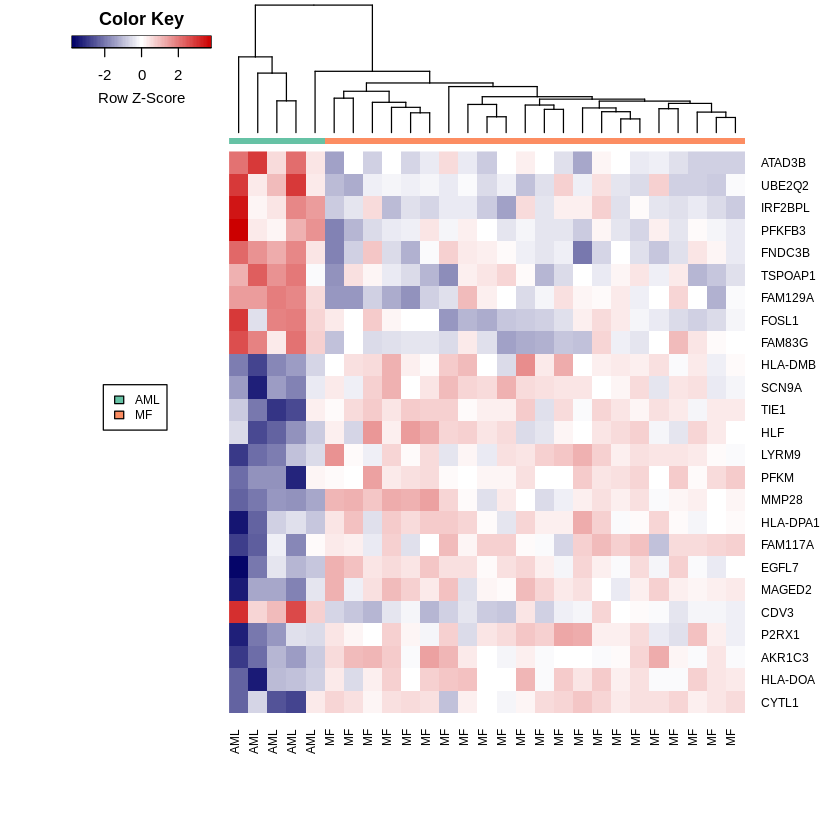

In [136]:
samples.tmp <- x.AML.MF.S$sample$Sample.type
table(samples.tmp)
samples.AML.MF.S <- as.factor(samples.tmp)

celltypes.AML.MF.S <- as.factor(as.character(x.AML.MF.S$sample$CellType))
design.AML.MF.S <- model.matrix(~0 + celltypes.AML.MF.S + samples.AML.MF.S)
colnames(design.AML.MF.S) <- c("CellType1","CellType2", "AML - MF")

v.AML.MF.S <- voom(x.AML.MF.S, design.AML.MF.S, plot=FALSE)
vfit.AML.MF.S <- lmFit(v.AML.MF.S,design.AML.MF.S)
efit.AML.MF.S <- eBayes(vfit.AML.MF.S)
dt.AML.MF.S <- decideTests(efit.AML.MF.S)
summary(dt.AML.MF.S)
topTable.AML.MF.S <- topTreat(efit.AML.MF.S, coef=3, n=Inf, sort.by="p")
x.AML.MF.S$genes[x.AML.MF.S$genes$genes %in% "ENSG00000129270", 2:3]  <- c("79148", "MMP28")
topgenes.AML.MF.S <- row.names(topTable.AML.MF.S)[1:25]
k.AML.MF.S <- which(row.names(x.AML.MF.S$counts) %in% topgenes.AML.MF.S)
logCPM.AML.MF.S <- cpm(x.AML.MF.S, log=TRUE)
group.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type)
col.samp.AML.MF.S <- samp.type.AML.MF.S <- as.factor(x.AML.MF.S$samples$Sample.type)
levels(col.samp.AML.MF.S) <-  brewer.pal(8, "Set2") 
col.samp.AML.MF.S <- as.character(col.samp.AML.MF.S)
mycol <- colorpanel(100,"#000066","white","#CC0000")

#pdf(file="Holm_Jamieson_AMLvMF_Stem_LimmaFactorCellType_DEGenes_Heatmap.pdf", width=7, height=9)
heatmap.2(logCPM.AML.MF.S[k.AML.MF.S,], scale="row",
labRow=x.AML.MF.S$genes$SYMBOL[k.AML.MF.S], labCol=x.AML.MF.S$samples$Sample.type,  
col=mycol, trace="none", density.info="none", ColSideColors=col.samp.AML.MF.S, key=T,
margin=c(8,6), lhei=c(2,10), dendrogram="column")
#
legend("left", fill = unique(col.samp.AML.MF.S),
legend = unique(group.AML.MF.S), inset=c(0,0), cex=.6)#
#dev.off()

## Figure 2B
### Venn Diagram of Differentially Expressed Genes Across Comparisons in Hematopoietic Stem Cells

[1] 20345     5

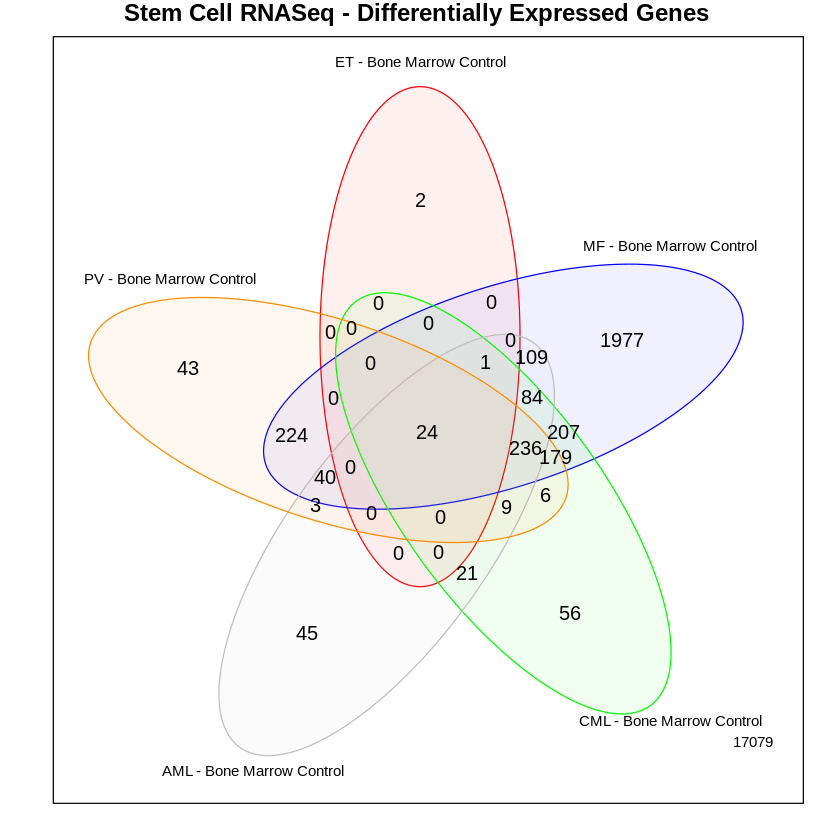

In [69]:
vennInput_withAML <- matrix(nrow = nrow(geneCount_coding.ABM.MF.S), ncol=5, data = 0)
dim(vennInput_withAML)
rownames(vennInput_withAML) <- rownames(geneCount_coding.ABM.MF.S)

vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.S)),1] <- dt.ABM.PV.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.PV.S))], 
                                            rownames(dt.ABM.PV.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.S)),2] <- dt.ABM.ET.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.ET.S))],
                                            rownames(dt.ABM.ET.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.S)),3] <- dt.ABM.MF.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.MF.S))], 
                                            rownames(dt.ABM.MF.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.S)),4] <- dt.ABM.CML.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.CML.S))], 
                                            rownames(dt.ABM.CML.S)),1]
vennInput_withAML[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.S)),5] <- dt.ABM.AML.S[match(
                                            rownames(vennInput_withAML)[which(rownames(vennInput_withAML) %in% rownames(dt.ABM.AML.S))], 
                                            rownames(dt.ABM.AML.S)),1]

colnames(vennInput_withAML) <- c("PV - Bone Marrow Control",
                          "ET - Bone Marrow Control",
                          "MF - Bone Marrow Control", 
                          "CML - Bone Marrow Control",
                          "AML - Bone Marrow Control")

#pdf("vennDiagram_AgedBMvsPV_ET_MF_CML_AML_Stem_Holm_Jamieson_TCW.pdf", width=7, height=7)
vennDiagram(vennInput_withAML,circle.col=c('red','blue','green','gray', 'dark orange'), cex=0.75, 
            show.include = FALSE, main="Stem Cell RNASeq - Differentially Expressed Genes ")
#dev.off()

## Identification of Genes in Differentially Expressed in Only One Comparison

In [118]:
#head(vennInput_withAML)
ABMvETonlygenes_withAML <- which(abs(vennInput_withAML[,2]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvETonlygenes_withAML)
ABMvETonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"], 
                         logFC=topTable.ABM.ET.S[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.S$genes), "logFC"],
                         adj.P.Val=topTable.ABM.ET.S[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.S$genes), "adj.P.Val"])
topTable.ABM.ET.uniqStem <- topTable.ABM.ET.S[match(rownames(vennInput_withAML[ABMvETonlygenes_withAML,]), topTable.ABM.ET.S$genes),]
#write.csv(ABMvETonly_withAML, file="RNAseq_DEgenes_only_ABMvET_Stem_withAML.csv")

ABMvPVonlygenes_withAML <- which(abs(vennInput_withAML[,1]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvPVonlygenes_withAML)
ABMvPVonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.PV.S[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.S$genes), "logFC"],
                         adj.P.Val=topTable.ABM.PV.S[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.S$genes), "adj.P.Val"])
topTable.ABM.PV.uniqStem <- topTable.ABM.PV.S[match(rownames(vennInput_withAML[ABMvPVonlygenes_withAML,]), topTable.ABM.PV.S$genes),]
#write.csv(ABMvPVonly_withAML, file="RNAseq_DEgenes_only_ABMvPV_Stem_withAML.csv")

ABMvMFonlygenes_withAML <- which(abs(vennInput_withAML[,3]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvMFonlygenes_withAML)
ABMvMFonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.MF.S[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.S$genes), "logFC"],
                         adj.P.Val=topTable.ABM.MF.S[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.S$genes), "adj.P.Val"])
topTable.ABM.MF.uniqStem <- topTable.ABM.MF.S[match(rownames(vennInput_withAML[ABMvMFonlygenes_withAML,]), topTable.ABM.MF.S$genes),]
#write.csv(ABMvMFonly_withAML, file="RNAseq_DEgenes_only_ABMvMF_Stem_withAML.csv")

ABMvCMLonlygenes_withAML <- which(abs(vennInput_withAML[,4]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvCMLonlygenes_withAML)
ABMvCMLonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.CML.S[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.S$genes), "logFC"],
                         adj.P.Val=topTable.ABM.CML.S[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.S$genes), "adj.P.Val"])
topTable.ABM.CML.uniqStem <- topTable.ABM.CML.S[match(rownames(vennInput_withAML[ABMvCMLonlygenes_withAML,]), topTable.ABM.CML.S$genes),]
#write.csv(ABMvCMLonly_withAML, file="RNAseq_DEgenes_only_ABMvCML_Stem_withAML.csv")

ABMvAMLonlygenes_withAML <- which(abs(vennInput_withAML[,5]) == 1 & rowSums(abs(vennInput_withAML)) == 1)
length(ABMvAMLonlygenes_withAML)
ABMvAMLonly_withAML <- data.frame(ENS=rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), 
                         EGID=pcgenes[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), pcgenes$ENSEMBL),"ENTREZID"],
                         SYM=pcgenes[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), pcgenes$ENSEMBL),"SYMBOL"],
                         logFC=topTable.ABM.AML.S[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.S$genes), "logFC"],
                         adj.P.Val=topTable.ABM.AML.S[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.S$genes), "adj.P.Val"])
topTable.ABM.AML.uniqStem <- topTable.ABM.AML.S[match(rownames(vennInput_withAML[ABMvAMLonlygenes_withAML,]), topTable.ABM.AML.S$genes),]
#write.csv(ABMvAMLonly_withAML, file="RNAseq_DEgenes_only_ABMvAML_Stem_withAML.csv")

[1] 2

[1] 43

[1] 1977

[1] 56

[1] 45

In [71]:
AllComps_withAML <- rownames(vennInput_withAML)[which(rowSums(abs(vennInput_withAML)) == 5)]
AllComps.anno <- data.frame(ENS=AllComps_withAML,ID=pcgenes[match(AllComps_withAML, pcgenes$ENSEMBL),c("ENTREZID", "SYMBOL")])
write.table(AllComps.anno, file="DEGenes_Stem_AllNormalComparisons.txt", sep="\t", row.names=FALSE, quote=FALSE)


AllComps.anno.df <- cbind(AllComps.anno,
      ABMvPV=topTable.ABM.PV.S[match(AllComps_withAML,rownames(topTable.ABM.PV.S)),c("logFC", "adj.P.Val")],
      ABMvET=topTable.ABM.ET.S[match(AllComps_withAML,rownames(topTable.ABM.ET.S)),c("logFC", "adj.P.Val")],
      ABMvMF=topTable.ABM.MF.S[match(AllComps_withAML,rownames(topTable.ABM.MF.S)),c("logFC", "adj.P.Val")],
      ABMvCML=topTable.ABM.CML.S[match(AllComps_withAML,rownames(topTable.ABM.CML.S)),c("logFC", "adj.P.Val")],
      ABMvAML=topTable.ABM.AML.S[match(AllComps_withAML,rownames(topTable.ABM.AML.S)),c("logFC", "adj.P.Val")])
head(AllComps.anno.df)
#write.table(AllComps.anno.df, file="DEGenes_Stem_AllNormalComparisons_withLogFCadjPval.txt", sep="\t", row.names=FALSE, quote=FALSE)


,ENS,ID.ENTREZID,ID.SYMBOL,ABMvPV.logFC,ABMvPV.adj.P.Val,ABMvET.logFC,ABMvET.adj.P.Val,ABMvMF.logFC,ABMvMF.adj.P.Val,ABMvCML.logFC,ABMvCML.adj.P.Val,ABMvAML.logFC,ABMvAML.adj.P.Val
1872,ENSG00000089009,6128,RPL6,-2.767343,0.0003997680,-2.898717,0.03114827,-2.706384,1.438859e-08,-2.295563,0.0071999107,-2.494360,0.0058641480
2298,ENSG00000100201,10521,DDX17,-3.345380,0.0003997680,-3.193666,0.04089144,-3.630790,3.967586e-11,-3.189794,0.0007378796,-4.300955,0.0026045122
2473,ENSG00000100813,22985,ACIN1,-2.602216,0.0003997680,-2.711456,0.03114827,-2.687651,1.008750e-12,-2.422189,0.0022438640,-2.434642,0.0017506868
3157,ENSG00000105202,2091,FBL,-3.035836,0.0004752356,-3.270859,0.03867461,-2.870491,4.413725e-11,-2.881009,0.0046086000,-3.102732,0.0040192644
3632,ENSG00000108292,NA,NA,-2.601542,0.0006344185,-2.313159,0.04089144,-2.773540,3.362306e-10,-2.879048,0.0024849111,-2.520542,0.0017506868
3882,ENSG00000110090,1374,CPT1A,-3.067123,0.0003997680,-2.993376,0.03114827,-2.906775,2.950311e-13,-3.019764,0.0003791757,-2.613669,0.0007700556


## Functional Enrichment, Pathway Enrichment Analyses

In [72]:
load("msigdb/human_c2_v5p2.rdata")
load("msigdb/human_c4_v5p2.rdata")
load("msigdb/human_c6_v5p2.rdata")
load("msigdb/human_H_v5p2.rdata")
library(SPIA)
library(WebGestaltR)
library(pathview)
library(GSVA)
library(GSEABase)
library(GSVAdata)
library(Biobase)
library(genefilter)
data(c2BroadSets)

org <- "hsapiens"
comps <- list(c("ABM", "ET", 0), c("ABM","PV", 0), c("ABM","MF", 0), c("ABM","CML", 0), c("ABM", "AML",0))
#dim(get(paste("x", comps[[1]][1], comps[[1]][2], "S", sep=".")))


Initialize Python Version 3.6.4 | packaged by conda-forge | (default, Dec 23 2017, 16:31:06) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]

******************************************

*                                        *

*          Welcome to WebGestaltR !      *

*                                        *

******************************************

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##########################################################

In [73]:

prep.spia.webgest <- function(comps, z, adjPval=0.05, refgenelist=NULL) {
    if(z == "") {
        tmp <- paste(comps[1], comps[2], sep= ".")
    } else {
        tmp <- paste(comps[1], comps[2], z, sep=".")
    }
    topTab <- get(paste("topTable", comps[1], comps[2], z, sep="."))
    topTab$ENTREZ <- unlist(as.list(topTab$ENTREZID))
    topTab <-topTab[!is.na(topTab$ENTREZ),]
    topTab <-topTab[!duplicated(topTab$ENTREZ),]
    tg1 <- topTab[topTab$adj.P.Val < adjPval,]
    DE_genes_spia = tg1$logFC
    DE_genes_webg = tg1$ENTREZ
    names(DE_genes_spia) <- as.vector(tg1$ENTREZ)
    if(is.null(refgenelist)) {
        ALL_genes = topTab$ENTREZ
    } else {
        ALL_genes = refgenelist[!is.na(refgenelist)]
    }
    write.table(DE_genes_webg, sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s_%s.txt", comps[1], comps[2], z), 
                sep="\t", row.names=F, col.names=F)
    write.table(ALL_genes, sprintf("DE_ReferenceGenes_%sv%s_%s.txt", comps[1], comps[2], z), 
                sep="\t",row.names=F, col.names=F)
    list(DE_genes_spia, ALL_genes)

}


do.webgestalt <- function(comps, z, org, addGeneSets=c()) {
    if (z == "") {
        interestGeneFile <- sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s.txt", comps[1], comps[2])
        referenceGeneFile <- sprintf("DE_ReferenceGenes_%sv%s.txt", comps[1], comps[2])
    } else {
        interestGeneFile <- sprintf("DE_InterestingGenes_Webgestalt_input_%sv%s_%s.txt", comps[1], comps[2], z)
        referenceGeneFile <- sprintf("DE_ReferenceGenes_%sv%s_%s.txt", comps[1], comps[2], z)
    }
    outputDirectory <- getwd()
    #for (database in listGeneSet(org)){
    for (database in c("geneontology_Biological_Process","geneontology_Molecular_Function","geneontology_Biological_Process_noRedundant",
                        "pathway_KEGG","pathway_Panther","pathway_Reactome","pathway_Wikipathway","network_Kinase_target",
                        "network_miRNA_target","network_PPI_BIOGRID","network_Transcription_Factor_target",
                        "disease_Disgenet", "disease_OMIM", "drug_DrugBank", "phenotype_Human_Phenotype_Ontology", 
                        addGeneSets)){
        enrichResult <- WebGestaltR(enrichMethod="ORA", organism=org, 
                                    enrichDatabase=database,interestGeneFile=interestGeneFile, 
                                    interestGeneType="entrezgene",referenceGeneFile=referenceGeneFile, 
                                    referenceGeneType="entrezgene",is.output=TRUE,
                                    outputDirectory=outputDirectory,
                                    projectName=sprintf("%sv%s_%s_%s", comps[1], comps[2], z, database))
    }
    enrichResult
}
    
do.gsea <- function(comps, z="S", cm=NULL, adjPvalueCutoff=0.2, 
                    runssGSEA=TRUE, plotHeatmap=TRUE) {
    
    canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]
    gene_exp <- get(paste("x", comps[1], comps[2], z, sep="."))$counts
    gene_ids <- get(paste("x", comps[1], comps[2], z, sep="."))$genes
    row.names(gene_exp) <- gene_ids$ENTREZID
    design <- get(paste("design", comps[1], comps[2], z, sep="."))

    gsva_exp <- gsva(gene_exp, canonicalC2BroadSets, mx.diff=TRUE, verbose=TRUE, parallel.sz=1,min.sz=5, max.sz=500)
    fit <- lmFit(gsva_exp$es.obs, design)
    if (!is.null(cm)) {
        fit2 <- contrasts.fit(fit, cm)
        fit2 <- eBayes(fit2)
        coef.int <- 1
    } else {
        fit2 <- eBayes(fit)
        coef.int <- as.numeric(comps[3])
    }
    logFCcutoff <- log2(2)
    allGeneSets <- topTable(fit2, coef=coef.int, number=Inf)
    DEgeneSets <- topTable(fit2, coef=coef.int, number=Inf,p.value=adjPvalueCutoff, adjust="BH")
    
    res <- decideTests(fit2, p.value=adjPvalueCutoff)
    message(sprintf("GSEA: Number of significant categories at FDR < %s:", adjPvalueCutoff))
    message(nrow(DEgeneSets[DEgeneSets$adj.P.Val < adjPvalueCutoff,]))
    write.csv(DEgeneSets, sprintf("GSEA_%sv%s_%s_LimmaOutput.csv", comps[1], comps[2], z))
    
    if(nrow(DEgeneSets) > 1 & plotHeatmap) {
        sig <- DEgeneSets[1:25,]
        #subset(DEgeneSets, adj.P.Val<0.99) #change this back
        all <- row.names(DEgeneSets)

        #heatmap
        pdf(sprintf("GSEA_%sv%s_%s_LimmaOutput_Heatmap.pdf", comps[1], comps[2], z), width=7, height=8)
        par(xpd=TRUE)
        require(gplots)
        #library(RColorBrewer)
        coul = colorRampPalette(rev(brewer.pal(8, "RdBu")))(25)
        gsva.sig <- subset(gsva_exp$es.obs, rownames(gsva_exp$es.obs) %in% row.names(sig))

        my_group=as.factor(get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type)
        my_col=brewer.pal(5, "Set2")[my_group]
        
        heatmap.2(gsva.sig, scale="row", col = coul, cexRow=.5, 
                  labCol=get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type,
          ColSideColors=my_col, key=T, trace="none", margins=c(5,10))
        legend("topright", fill = unique(my_col), legend = unique(my_group), inset=c(-.05,0))
        dev.off()
    } else {
        message("No heatmap made for GSEA analysis!")
    }
    
    if(runssGSEA) {
        do.ssgsea(comps, z, gene_exp, design, cm, adjPvalueCutoff, plotHeatmap)
    #    gsva_exp.ss <- gsva(gene_exp, c2BroadSets, mx.diff=TRUE, method="ssgsea", verbose=TRUE, 
    #                parallel.sz=1,min.sz=5, max.sz=500)
    #    fit.ss <- lmFit(gsva_exp.ss, design_rep)
    #    if (!is.null(cm)) {
    #        fit2.ss <- contrasts.fit(fit.ss, cm)
    #    }
    #    fit2.ss <- eBayes(fit.ss)
    #    ## set1 is differentially expressed
    #    #topTable(fit2.ss, coef=2)
    #    logFCcutoff <- log2(2)
    #    allGeneSets.ss <- topTable(fit2.ss, coef=2, number=Inf)
    #    DEgeneSets.ss <- topTable(fit2.ss, coef=2, number=Inf,p.value=adjPvalueCutoff, adjust="BH")
    #    res.ss <- decideTests(fit2.ss, p.value=adjPvalueCutoff)
    #    summary(res.ss)
    #
    #    write.csv(DEgeneSets.ss, sprintf("ssGSEA_%sv%s_LimmaOutput.csv", comps[1], comps[2]))
    }
        
}

do.ssgsea  <- function(comps, z="S", gene_exp.ss=NULL, design.ss=NULL, 
                       cm=NULL, adjPvalueCutoff=0.2, plotHeatmap=TRUE) {
    if(is.null(gene_exp.ss)) {
        gene_exp.ss <- get(paste("x", comps[1], comps[2], z, sep="."))
    }
    
    if(is.null(design.ss)) {
        design.ss <- get(paste("design", comps[1], comps[2], z, sep="."))
    }
    
    gsva_exp.ss <- gsva(gene_exp.ss, canonicalC2BroadSets, mx.diff=TRUE, method="ssgsea", verbose=TRUE, 
                    parallel.sz=1,min.sz=5, max.sz=500)
    ## fit the same linear model now to the GSVA enrichment scores
    fit.ss <- lmFit(gsva_exp.ss, design.ss)

    if (is.null(cm)) {
        fit2.ss <- eBayes(fit.ss)
        coef.int.ss <- as.numeric(comps[3])
    } else {
        fit2.ss <- contrasts.fit(fit.ss, cm)
        fit2.ss <- eBayes(fit2.ss)
        coef.int.ss <- 1
    }
    

    logFCcutoff <- log2(2)
    allGeneSets.ss <- topTable(fit2.ss, coef=coef.int.ss, number=Inf)
    DEgeneSets.ss <- topTable(fit2.ss, coef=coef.int.ss, number=Inf, 
                             p.value=adjPvalueCutoff, adjust="BH")
    message(sprintf("ssGSEA: Number of significant categories at FDR < %s:", adjPvalueCutoff))
    message(nrow(DEgeneSets.ss[DEgeneSets.ss$adj.P.Val < adjPvalueCutoff,]))

    res.ss <- decideTests(fit2.ss, p.value=adjPvalueCutoff)
    #summary(res.ss)
    write.csv(DEgeneSets.ss, sprintf("ssGSEA_%sv%s_%s_LimmaOutput.csv", comps[1], comps[2], z))
    
    if(nrow(DEgeneSets.ss) > 1 & plotHeatmap) {
        sig.ss <- DEgeneSets.ss[1:25,]
        #subset(DEgeneSets, adj.P.Val<0.99) #change this back
        all.ss <- row.names(DEgeneSets.ss)

        #heatmap
        pdf(sprintf("ssGSEA_%sv%s_%s_LimmaOutput_Heatmap.pdf", comps[1], comps[2], z), width=7, height=8)
        par(xpd=TRUE)
        require(gplots)
        #library(RColorBrewer)
        coul = colorRampPalette(rev(brewer.pal(8, "RdBu")))(25)
        gsva.sig.ss <- subset(gsva_exp.ss, rownames(gsva_exp.ss) %in% row.names(sig.ss))

        my_group=as.factor(get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type)
        my_col=brewer.pal(5, "Set2")[my_group]
    
        heatmap.2(gsva.sig.ss, scale="row", col = coul, cexRow=.5, 
                  labCol=get(paste("x", comps[1], comps[2], z, sep="."))$samples$Sample.type,
          ColSideColors=my_col, key=T, trace="none", margins=c(5,10))
        legend("topright", fill = unique(my_col), legend = unique(my_group), inset=c(-.05,0))
        dev.off()

    } else {
        message("No heatmap made for ssGSEA analysis!")
    }

    
}


In [74]:
run.enrichment.algs <- function(x, z="S", 
                               camera.sets=c("Hs.c2", "Hs.c4", "Hs.c6"),
                               webGest.sets=c(), fcdir=FALSE, refgenelist=NULL, 
                               run.go=TRUE, 
                               run.kegg=TRUE, run.camera=TRUE, 
                               run.spia=TRUE, run.webgest=TRUE, 
                               run.gsea=TRUE, run.ssgsea=TRUE) {
    
    message(sprintf("Comparison: %s vs %s in type %s", x[1], x[2], z))                            
    output_list <- list(summary=list(), output=list())
    tmp <- paste(x[1], x[2], z, sep=".")
    dge <- paste("x",tmp, sep=".")
    design <- paste("design", tmp, sep=".")
    fit <- paste("efit", tmp, sep=".")
    de <- paste("topTable", tmp, sep=".")
    
    if(run.go) {
        if(fcdir) {
            go.res <- goana(get(fit), geneid="ENTREZID", species="Hs")
            go.out <- topGO(go.res, n=Inf)
            go.out$adjP.Up <- p.adjust(topGO(go.res, n=Inf)$P.Up, method = "BH")
            go.out$adjP.Down <- p.adjust(topGO(go.res, n=Inf)$P.Down, method = "BH")
            output_list[["summary"]][["GoAna"]] <-  c(Up=sum(go.out$adjP.Up < 0.05),
                                                       Down=sum(go.out$adjP.Down < 0.05))
        } else {
            if(is.data.frame(get(paste("topTable", tmp, sep=".")))) {
                out <- EG2SYM[match(get(paste("topTable", tmp, sep="."))$ENTREZID,
                                    EG2SYM$gene_id,), "gene_id"]
                out <- out[!is.na(out)]
            } else {
                stop(paste0(paste("topTable", tmp, sep="."), " is not a data frame!"))
            }
            go.res <- goana(out, geneid="ENTREZID", species="Hs")
            go.out <- topGO(go.res, n=Inf)
            go.out$adjP.DE <- p.adjust(topGO(go.res, n=Inf)$P.DE, method = "BH")
            output_list[["summary"]][["GoAna"]] <-  c(DE=sum(go.out$adjP.DE < 0.05))
        }
        output_list[["output"]][["GoAna"]] <- go.out
    }
    if(run.kegg) {
        if(fcdir) {
            kegg.res <- kegga(get(fit), geneid="ENTREZID", species="Hs")
            kegg.out <- topKEGG(kegg.res, n=Inf)
            kegg.out$adjP.Up <- p.adjust(topKEGG(kegg.res, n=Inf)$P.Up, method = "BH")
            kegg.out$adjP.Down <- p.adjust(topKEGG(kegg.res, n=Inf)$P.Down, method = "BH")
            output_list[["summary"]][["KeggAna"]] <- c(Up=sum(kegg.out$adjP.Up < 0.05),
                                                   Down=sum(kegg.out$adjP.Down < 0.05))
        } else {
            if(is.data.frame(get(paste("topTable", tmp, sep=".")))) {
                out <- EG2SYM[match(get(paste("topTable", tmp, sep="."))$ENTREZID,
                                    EG2SYM$gene_id,), "gene_id"]
                out <- out[!is.na(out)]
            } else {
                stop(paste0(paste("topTable", tmp, sep="."), " is not a data frame!"))
            }
            kegg.res <- kegga(out, geneid="ENTREZID", species="Hs")
            kegg.out <- topKEGG(kegg.res, n=Inf)
            kegg.out$adjP.DE <- p.adjust(topKEGG(kegg.res, n=Inf)$P.DE, method = "BH")
            output_list[["summary"]][["KeggAna"]] <-  c(DE=sum(kegg.out$adjP.DE < 0.05)) 
        }
        output_list[["output"]][["KeggAna"]] <- kegg.out
    }
    if(run.camera) {
        logCPM <- cpm(get(dge), log=TRUE)
        if(x[3] == 0) {
            cam.res <- lapply(camera.sets, function(y) {
                if(class(get(y)) != "list") {
                    f <- paste0("human_", strsplit(y, split="\\.")[[1]][2], "_v5p2.rdata")
                    load(f)
                }
                idx <- ids2indices(get(y), id=get(dge)$genes$ENTREZID)
                camera <- camera(logCPM, idx, get(design),
                                 contrast=get(paste("cm", tmp,sep=".")))
            })
        } else {
            cam.res <- lapply(camera.sets, function(y) {
                if(class(get(y)) != "list") {
                    f <- paste0("human_", strsplit(y, split="\\.")[[1]][2], "_v5p2.rdata")
                    load(f)
                }
                idx <- ids2indices(get(y), id=get(dge)$genes$ENTREZID)
                camera <- camera(logCPM, idx, get(design), contrast=as.numeric(x[3]))
            })
        }
        output_list[["output"]][["Camera"]] <- cam.res
        output_list[["summary"]][["Camera"]] <- unlist(lapply(1:length(camera.sets), function(i) {
            sum(cam.res[[i]]$FDR < 0.05)
        }))
    }
    
    if(run.spia | run.webgest) {
        
        spia.webges.inp <- prep.spia.webgest(x, z, adjPval = 0.05, refgenelist)
        if (run.spia) {
            spia.res <- spia(de=spia.webges.inp[[1]],all=spia.webges.inp[[2]],organism="hsa",
                  nB=2000,plots=FALSE,beta=NULL,combine="fisher",verbose=FALSE)
            output_list[["output"]][["SPIA"]] <- spia.res
            output_list[["summary"]][["SPIA"]] <- sum(spia.res$pGFdr < 0.05)
        } 
        if (run.webgest) {
            webgest.res <- do.webgestalt(x, z=z, org="hsapiens", addGeneSets=webGest.sets)
            output_list[["output"]][["WebGestalt"]] <- webgest.res
            output_list[["summary"]][["WebGestalt"]] <- unlist(lapply(webgest.res,nrow))
        }
    }
    
    if(run.gsea | run.ssgsea) {
        if(x[3]==0) {
            gsea.res <- do.gsea(x, z, cm=get(paste("cm", tmp,sep=".")), adjPvalueCutoff=0.2, 
                                runssGSEA=run.ssgsea, plotHeatmap=TRUE)
            if(run.ssgsea) {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            } else {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            }
        } else {
            gsea.res <- do.gsea(x, z, cm=NULL, 
                                adjPvalueCutoff=0.2, 
                                runssGSEA=run.ssgsea, plotHeatmap=TRUE)
            if(run.ssgsea) {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            } else {
                output_list[["summary"]][["GSEA"]] <- gsea.res
            }
        }
        output_list[["output"]][["GSEA"]] <- gsea.res
    }
    
    return(output_list)
}

In [75]:
kegg_go_enrichment_alg_output <- lapply(comps, function(x, z="uniqStem") {
    run.enrichment.algs(x, z, webGest.sets="network_TCGA_RNASeq_LAML", fcdir=FALSE,
                       run.webgest=FALSE, run.gsea=FALSE, run.ssgsea=FALSE,
                       run.go=TRUE, run.kegg=TRUE, run.camera=FALSE, run.spia=FALSE)
})

Comparison: ABM vs ET in type uniqStem
Comparison: ABM vs PV in type uniqStem
Comparison: ABM vs MF in type uniqStem
Comparison: ABM vs CML in type uniqStem
Comparison: ABM vs AML in type uniqStem


In [76]:
spia_enrichment_alg_output <- lapply(1:length(comps), function(x, z="uniqStem") {
    run.enrichment.algs(comps[[x]], z, webGest.sets="network_TCGA_RNASeq_LAML", 
                        refgenelist=get(paste("topTable", comps[[x]][1], comps[[x]][2], "S", sep="."))$ENTREZID, 
                       run.spia=TRUE, run.webgest=FALSE, run.gsea=FALSE, run.ssgsea=FALSE,
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE)
})

Comparison: ABM vs ET in type uniqStem
Comparison: ABM vs PV in type uniqStem
Comparison: ABM vs MF in type uniqStem
Comparison: ABM vs CML in type uniqStem
Comparison: ABM vs AML in type uniqStem


In [77]:
lapply(spia_enrichment_alg_output, function(x) {
    message(x$summary$SPIA)
    head(x$output$SPIA)
    })

1
0
0
0
0


Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
ECM-receptor interaction,04512,35,1,0.006422591,0,1,0.0388434,0.0388434,0.0388434,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04512+2812
Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
ECM-receptor interaction,04512,30,1,0.1144425,-1.386315,0.104,0.06464041,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04512+3339
Progesterone-mediated oocyte maturation,04914,63,1,0.2255696,-1.467655,0.131,0.13361403,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04914+8379
Alzheimer's disease,05010,137,2,0.1054997,0.000000,1.000,0.34277340,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05010+4519+322
Cell cycle,04110,105,1,0.3474672,-1.257990,0.357,0.38294233,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04110+8379
Vibrio cholerae infection,05110,41,1,0.1531129,0.000000,1.000,0.44044152,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05110+527
Antigen processing and presentation,04612,42,1,0.1565455,0.000000,1.000,0.44684482,0.8219096,1,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04612+6890
Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
Sulfur relay system,04122,5,3,0.08173899,5.726455,0.009,0.006043192,0.8037446,0.8037446,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa04122+348180+90353+4357


In [90]:
ABMvAML_SPIA_alg_output <- lapply(list(c("ABM","AML", 0)), function(x, z="S") {
    run.enrichment.algs(x, z, webGest.sets="network_TCGA_RNASeq_LAML", 
                          refgenelist=topTable.ABM.AML.S$ENTREZID,
                        run.webgest=FALSE, run.gsea=FALSE, run.ssgsea=FALSE,
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE, run.spia=TRUE)
})
#write.csv(ABMvAML_enrichment_alg_output[[1]][["output"]]$SPIA, file="SPIA_ABMvAML_Stem.csv")
lapply(ABMvAML_SPIA_alg_output, function(x) x[["summary"]])
lapply(ABMvAML_SPIA_alg_output, function(x) lapply(x[["output"]][c(1,2,4)], function(y) head(y)))

Comparison: ABM vs AML in type S


[[1]]
[[1]]$SPIA
[1] 0

Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
Glutamatergic synapse,04724,55,8,0.010042234,-12.2807842,0.042,0.003699396,0.2799228,0.4402281,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04724+2901+5566+2773+5532+5534+156+1742+85358
Cocaine addiction,05030,22,5,0.006042434,-8.3442912,0.109,0.005483290,0.2799228,0.6525115,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05030+5566+2773+2354+1388+1742
Amphetamine addiction,05031,30,7,0.001003369,0.9094908,0.875,0.007056876,0.2799228,0.8397683,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa05031+818+5566+1388+5532+5534+2353+2354
Epstein-Barr virus infection,05169,172,9,0.613743877,13.7065548,0.003,0.013436057,0.3602137,1.0000000,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa05169+10014+7532+7533+1027+3654+10000+208+3661+5566
Toxoplasmosis,05145,87,5,0.528521833,17.3524683,0.004,0.015135030,0.3602137,1.0000000,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa05145+3654+2773+331+10000+208
Axon guidance,04360,66,8,0.028024509,-11.1265158,0.094,0.018279794,0.3612594,1.0000000,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04360+2773+5532+5534+3983+5921+2050+5998+23365


In [79]:
AMLvMF_spia_alg_output <- lapply(list(c("AML", "MF", 3)), function(x, z="S") {
    run.enrichment.algs(x, z, webGest.sets="network_TCGA_RNASeq_LAML",
                        refgenelist=topTable.AML.MF.S$ENTREZID,
                       run.webgest=FALSE, run.spia=TRUE, 
                       run.go=FALSE, run.kegg=FALSE, run.camera=FALSE,
                       run.gsea=FALSE, run.ssgsea=FALSE)
})

lapply(AMLvMF_spia_alg_output, function(x) x[["summary"]])
lapply(AMLvMF_spia_alg_output, function(x) lapply(x[["output"]][c(1,2,4)], function(y) head(y)))

Comparison: AML vs MF in type S


[[1]]
[[1]]$SPIA
[1] 11

Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK
Antigen processing and presentation,04612,40,14,1.312772e-04,8.499175,5e-06,1.453519e-08,1.918645e-06,1.918645e-06,Activated,http://www.genome.jp/dbget-bin/show_pathway?hsa04612+972+3108+3109+4261+1508+1520+567+3133+3134+3111+3113+3115+3122+3123
Autoimmune thyroid disease,05320,13,9,2.245983e-06,0.000000,NA,2.245983e-06,6.587233e-05,2.964697e-04,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05320+3108+3109+3111+3113+3115+3122+3123+3133+3134
Graft-versus-host disease,05332,13,9,2.245983e-06,0.000000,NA,2.245983e-06,6.587233e-05,2.964697e-04,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05332+3108+3109+3111+3113+3115+3122+3123+3133+3134
Type I diabetes mellitus,04940,16,10,2.371609e-06,0.000000,NA,2.371609e-06,6.587233e-05,3.130524e-04,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa04940+3382+3108+3109+3111+3113+3115+3122+3123+3133+3134
Asthma,05310,8,7,2.495164e-06,0.000000,NA,2.495164e-06,6.587233e-05,3.293616e-04,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05310+3108+3109+3111+3113+3115+3122+3123
Allograft rejection,05330,14,9,5.618758e-06,0.000000,NA,5.618758e-06,1.236127e-04,7.416760e-04,Inhibited,http://www.genome.jp/dbget-bin/show_pathway?hsa05330+3108+3109+3111+3113+3115+3122+3123+3133+3134


## Analyze Expression of Spliceosome Genes

In [81]:
canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]

Splicing_c2_paths <- Hs.c2[grep("SPLIC", names(Hs.c2))]
Splicing_c5_paths <- Hs.c5[grep("SPLIC", names(Hs.c5))]
Splicing2_c2_paths <- as.list(canonicalC2BroadSets)[grep("SPLIC", names(canonicalC2BroadSets))]
Cytokine_path <- canonicalC2BroadSets[grep("KEGG_CYTOKINE_CYTO", names(canonicalC2BroadSets))]

In [82]:
catlist <- list(canonC2=geneIds(Splicing2_c2_paths), C5=Splicing_c5_paths)
splicingCat.DEoverlap.Stem <- do.call(cbind, lapply(1:ncol(vennInput_withAML), function(x) {
    unlist(lapply(catlist, function(y) {
        unlist(lapply(y, function(z) {
            sig_genes <- row.names(vennInput_withAML[vennInput_withAML[,x] != 0,])
            sig_genes2 <- ENS2EG[match(sig_genes, ENS2EG$ensembl_id), "gene_id"]
            #message(length(sig_genes))
            over <- sig_genes2[sig_genes2 %in% z]
            s <- as.numeric(sum(sig_genes2 %in% z))
            #message(s)
            u <- nrow(vennInput_withAML) - length(z)
            if (s > 5) {
                phyper(s, length(z), u, length(sig_genes2), lower.tail=FALSE)
            } else {
                0.5
            }
        }))
    }))
}))
    
colnames(splicingCat.DEoverlap.Stem)  <- colnames(vennInput_withAML)
apply(vennInput_withAML, 2, table)
splicingCat.DEoverlap.Stem.padj <- apply(splicingCat.DEoverlap.Stem, 2, function(x) p.adjust(x, method="BH"))
splicingCat.DEoverlap.Stem.padj

splicingCat.DEoverlapGenes.Stem <- lapply(1:ncol(vennInput_withAML), function(x) {
    lapply(catlist, function(y) {
        lapply(y, function(z) {
            sig_genes <- row.names(vennInput_withAML[vennInput_withAML[,x] != 0,])
            sig_genes2 <- ENS2EG[match(sig_genes, ENS2EG$ensembl_id), "gene_id"]
            #message(length(sig_genes))
            over <- sig_genes2[sig_genes2 %in% z]
            s <- sum(sig_genes2 %in% z)
            #message(s)
            u <- nrow(vennInput_withAML) - length(z)
            list(s, over)
        })
    })
})
   
sumoutput <- do.call(cbind, lapply(splicingCat.DEoverlapGenes.Stem, function(x) {
    unlist(lapply(x, function(y) unlist(lapply(y, function(z)  z[[1]]))))}))
colnames(sumoutput) <- colnames(vennInput_withAML)
sumoutput

,PV - Bone Marrow Control,ET - Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
-1,477,22,1550,456,417
0,19581,20318,17264,19522,19773
1,287,5,1531,367,155


,PV - Bone Marrow Control,ET - Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
canonC2.KEGG_SPLICEOSOME,3.145439e-04,0.5,5.075903e-07,6.965605e-03,1.440549e-03
canonC2.REACTOME_MRNA_SPLICING,4.345050e-06,0.5,1.205196e-10,2.377567e-06,2.666452e-03
canonC2.REACTOME_MRNA_SPLICING_MINOR_PATHWAY,5.000000e-01,0.5,1.851605e-03,5.000000e-01,5.000000e-01
C5.GO_MRNA_SPLICE_SITE_SELECTION,5.000000e-01,0.5,1.384203e-05,5.000000e-01,5.000000e-01
C5.GO_POSITIVE_REGULATION_OF_RNA_SPLICING,5.000000e-01,0.5,1.200665e-02,5.000000e-01,5.000000e-01
C5.GO_ALTERNATIVE_MRNA_SPLICING_VIA_SPLICEOSOME,5.000000e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
C5.GO_NEGATIVE_REGULATION_OF_RNA_SPLICING,1.261487e-05,0.5,1.205196e-10,5.643982e-07,5.285569e-05
C5.GO_POSITIVE_REGULATION_OF_MRNA_SPLICING_VIA_SPLICEOSOME,5.000000e-01,0.5,4.189339e-03,5.000000e-01,5.000000e-01
C5.GO_SPLICEOSOMAL_TRI_SNRNP_COMPLEX_ASSEMBLY,5.000000e-01,0.5,5.000000e-01,5.000000e-01,5.000000e-01
C5.GO_RNA_SPLICING_VIA_ENDONUCLEOLYTIC_CLEAVAGE_AND_LIGATION,5.000000e-01,0.5,2.334306e-03,5.000000e-01,5.000000e-01


,PV - Bone Marrow Control,ET - Bone Marrow Control,MF - Bone Marrow Control,CML - Bone Marrow Control,AML - Bone Marrow Control
canonC2.KEGG_SPLICEOSOME,14,1,42,12,11
canonC2.REACTOME_MRNA_SPLICING,16,0,44,17,9
canonC2.REACTOME_MRNA_SPLICING_MINOR_PATHWAY,4,0,14,4,1
C5.GO_MRNA_SPLICE_SITE_SELECTION,3,0,13,2,1
C5.GO_POSITIVE_REGULATION_OF_RNA_SPLICING,3,0,8,3,3
C5.GO_ALTERNATIVE_MRNA_SPLICING_VIA_SPLICEOSOME,1,0,4,0,0
C5.GO_NEGATIVE_REGULATION_OF_RNA_SPLICING,7,1,18,9,6
C5.GO_POSITIVE_REGULATION_OF_MRNA_SPLICING_VIA_SPLICEOSOME,2,0,6,2,2
C5.GO_SPLICEOSOMAL_TRI_SNRNP_COMPLEX_ASSEMBLY,2,0,5,2,2
C5.GO_RNA_SPLICING_VIA_ENDONUCLEOLYTIC_CLEAVAGE_AND_LIGATION,1,0,7,2,1


## Figure 3A
### Venn Diagram of Differentially Expressed Spliceosome Genes Across Comparisons in Hematopoietic Stem Cells

[1] 44  5

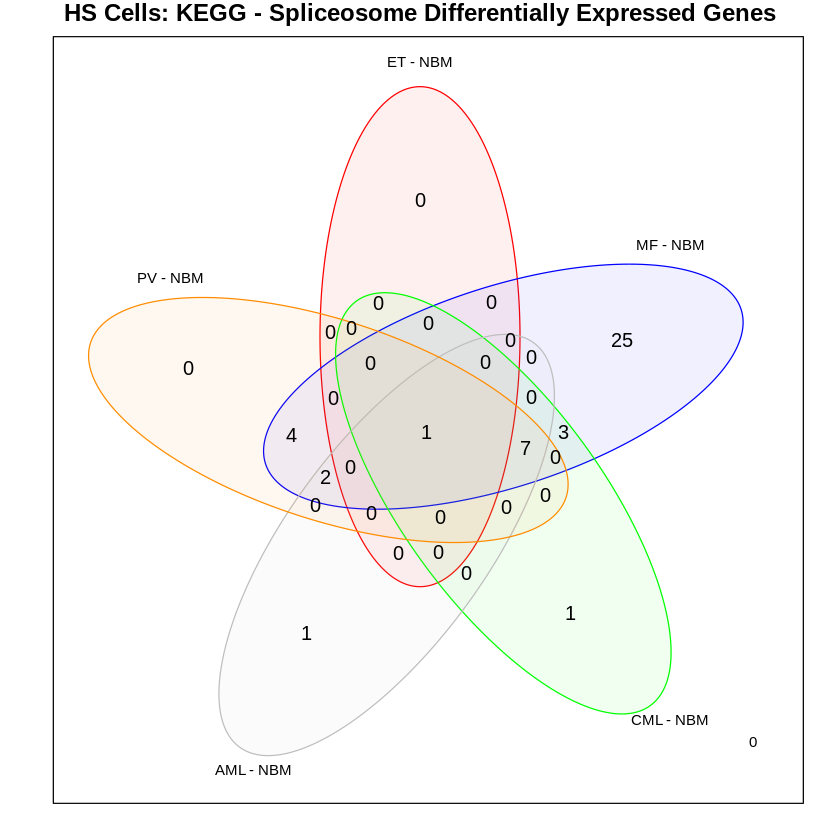

In [86]:
sig.Stem <- unique(unlist(lapply(splicingCat.DEoverlapGenes.Stem, function(x) {
     x[[1]][[1]][[2]]
})))

sig.Stem.ENS <- ENS2EG[ENS2EG$gene_id %in% sig.Stem, "ensembl_id"]
dt.Stem.Spl <- vennInput_withAML[row.names(vennInput_withAML) %in% sig.Stem.ENS,]
dim(dt.Stem.Spl)
colnames(dt.Stem.Spl) <- gsub("Bone Marrow Control","NBM",colnames(vennInput_withAML)) 

#pdf("vennDiagram_NormalBMvsPV_ET_MF_CML_AML_Stem_SpliceosomeDEGenes_Holm_Jamieson.pdf", width=7, height=7)
vennDiagram(dt.Stem.Spl, circle.col=c('red','blue','green', 'gray', "dark orange"), cex=0.75,
           show.include = FALSE, main="HS Cells: KEGG - Spliceosome Differentially Expressed Genes")

#dev.off()

### Preprocessing for Heatmap Creation

In [109]:
library(gplots)
risk.colors <- RColorBrewer::brewer.pal(n = 12,name = 'Paired')
names(risk.colors) <- c("AP_CML", "CML", "CP_CML", "CLL", "ET", "PV", "IR_MF", "HR_MF", "MF", "NBM", "placeholder","AML")
risk.colors.sub <- risk.colors[names(risk.colors) %in% c("NBM", "PV", "ET", "MF", "CML", "AML")] 
risk.order <- as.numeric(factor(names(risk.colors.sub), levels=c("NBM", "PV", "ET", "MF", "CML", "AML")))
risk.order
risk.colors.sub2 <- risk.colors.sub[risk.order]
class(risk.colors.sub)

meta2 <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20180326.csv", header=TRUE, stringsAsFactors = FALSE)
meta2$Phenotype <- meta2$Condition_code2
meta2$Phenotype[which(meta2$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "NBM"
meta2_filt <- subset(meta2, Phenotype %in% c("NBM", "MF", "PV", "ET", "CML", "AML") & 
                       Cell.type %in% c("Stem"))
meta2_filt$JAK2 <- meta2_filt$Mutation
dim(meta2_filt)
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta2_filt$JAK2[meta2_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta2_filt$Mutation <- meta2_filt$JAK2
meta2_filt$JAK2[!meta2_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta2_filt$Tissue <- meta2_filt$Tissue.Type
meta2_filt$Tissue[meta2_filt$Tissue %in% c("Peripheral blood")] <- "Peripheral Blood"
meta2_filt$Cells <- meta2_filt$Cell.type
meta2_filt$Treatment <- as.character(gsub("^p", "P", gsub("_", " ", gsub("_c" ," C", 
                                         gsub("2i", "2 i", gsub("Shh_inhibitor", "Other",meta2_filt$Treatment_code2))))))

gene_counts_new_ord <- gene_counts_new[,match(gsub("_S[0-9]*$", "", meta2_filt$Sample), 
                                             gsub("_S[0-9]*$", "", colnames(gene_counts_new)))]
dim(gene_counts_new_ord)
ord <- order(meta2_filt$Cells, meta2_filt$Phenotype, meta2_filt$Tissue, meta2_filt$JAK2)
meta2_filt2b <- meta2_filt[ord,]
gene_counts_new_ord <- gene_counts_new_ord[,ord]

id_list <- gsub("[.].*$","", rownames(gene_counts_new_ord))
rownames(gene_counts_new_ord) <- id_list
DGE_all <- DGEList(counts = gene_counts_new_ord, lib.size = colSums(gene_counts_new_ord),
                   norm.factors = rep(1,ncol(gene_counts_new_ord)), samples = meta2_filt2b,
                   group = meta2_filt2b$Phenotype, genes = id_list, remove.zeros = FALSE) 

dim(gene_counts_new_ord)
cpm <- cpm(DGE_all)
lcpm <- cpm(DGE_all, log=TRUE)
keep.exprs <- rowSums(cpm>1)>=5
DGE_all_filt <- DGE_all[keep.exprs,, keep.lib.sizes=FALSE]
dim(DGE_all)
DGE_all_filt <- calcNormFactors(DGE_all_filt, method = "TMM")
dim(DGE_all_filt)

lcpm2 <- cpm(DGE_all_filt, log=TRUE)
col.samp.pheno <- samp.type <- factor(meta2_filt2b$Phenotype,levels=c("NBM", "PV", "ET", "MF", "CML", "AML"))
levels(col.samp.pheno) <-  risk.colors.sub2
samp.labels <- as.character(meta2_filt2b$Sample.type2)
mycol <- colorpanel(100,"#000066","white","#CC0000")


[1] 5 3 2 4 1 6

[1] "character"

[1] 47 19

[1] 57820    47

[1] 57820    47

[1] 57820    47

[1] 17384    47

## Figure 3B
### Heatmap of DE Spliceosome Genes in NBM vs MF in Hematopoietic Stem Cells

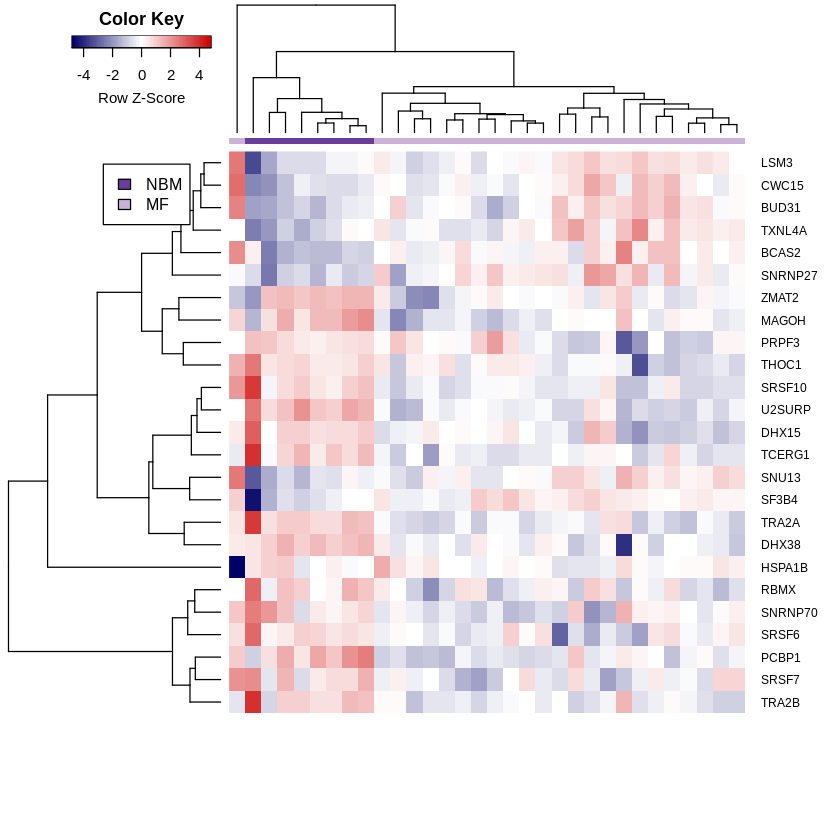

In [117]:
ABMvMF.Stem.Uniq <- rownames(vennInput_withAML)[apply(vennInput_withAML, 1, function(x) {
    (sum(abs(x)) == 1) &  (abs(x[3]) == 1)
})]

KEGG.Splice.sig.ABMvMF.Stem <- splicingCat.DEoverlapGenes.Stem[[3]][[1]][[1]][[2]]
KEGG.Splice.sig.ABMvMF.Stem.ENS <- ENS2EG2SYM[ENS2EG2SYM$gene_id %in% KEGG.Splice.sig.ABMvMF.Stem, "ens_id.ensembl_id"]
KEGG.Splice.sig.ABMvMF.Stem.filt <- KEGG.Splice.sig.ABMvMF.Stem.ENS[KEGG.Splice.sig.ABMvMF.Stem.ENS %in%
                                                                    ABMvMF.Stem.Uniq]
dt.Stem.Spl <- vennInput_withAML[row.names(vennInput_withAML) %in% KEGG.Splice.sig.ABMvMF.Stem.filt,]
colnames(dt.Stem.Spl) <- gsub("Bone Marrow Control","NBM",colnames(vennInput_withAML)) 

lcpm2.KEGG.Splice.sig.ABMvMF.Stem.filt <- lcpm2[rownames(lcpm2) %in% KEGG.Splice.sig.ABMvMF.Stem.filt,
                                               as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")]

samp.type.NBMvMF <- factor(as.character(meta2_filt2b$Phenotype)[as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")], levels=c("NBM", "MF"))
samp.labels.NBMvMF <- as.character(meta2_filt2b$Phenotype)[as.character(meta2_filt2b$Phenotype) %in% c("NBM", "MF")]
col.samp.pheno.NBMvMF2 <- as.character(col.samp.pheno)[as.character(col.samp.pheno) %in% levels(col.samp.pheno)[c(1,4)]]

#pdf("Holm_Jamieson_HSCells_NBMvMF_SpliceosomeDEGenes_RNAexpressionHeatmap.pdf", width=8, height=10)
heatmap.2(lcpm2.KEGG.Splice.sig.ABMvMF.Stem.filt, scale="row", cex.lab=0.8,
          labRow=ENS2EG2SYM[match(rownames(lcpm2.KEGG.Splice.sig.ABMvMF.Stem.filt), 
                             gsub("[.].*$","",ENS2EG2SYM$ens_id.ensembl_id)), "SYM"],#
          labCol="", #labRow="",
          col=mycol, trace="none", density.info="none", ColSideColors=col.samp.pheno.NBMvMF2, key=T,
          margin=c(8,6), 
          lhei=c(2,10), 
          dendrogram="both")

legend("topleft", fill = levels(col.samp.pheno)[c(1,4)], 
       legend = levels(samp.type.NBMvMF), 
       inset=c(0,0.1), cex=.8)
#dev.off()